In [1]:
%load_ext autoreload
# always reload modules marked with "%aimport"
%autoreload 1

import os,sys
import numpy as np
import pandas as pd

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.getcwd(), '../..', 'src')
sys.path.append(src_dir)

%aimport plot_utils
from plot_utils import *
%aimport preprocessing
from preprocessing import *
%aimport data_source
from data_source import *
%aimport model_manage
from model_manage import *
%aimport model_regression
from model_regression import *

import logging
from utils import *
set_logger(logging.DEBUG)

In [2]:
import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet

In [3]:
ds = DataSource(host='localhost',port=5432, username='postgres', password='', database='sdra')
ds.show_views()
#ds.update_views()

[dp] connect to database postgresql://postgres:@localhost:5432/sdra
[dp] supported views: ['properties', 'property_features', 'transactions', 'property_addresses', 'property_address_transactions', 'property_transaction_valid', 'property_address_school_transactions']


In [4]:
df_transaction = ds.get_view_df('property_address_transactions')
df_property = ds.get_view_df('property_addresses')
print(df_transaction.shape)
print(df_property.shape)

(1475109, 25)
(709325, 22)


In [5]:
pp = Preprocess(df_transaction, df_property, target='sold_price')

In [6]:
use_features = pp.get_feature_list()
school_features = ['min_elem_distance', 'min_middle_distance', 'min_high_distance',
                   'elem_rating', 'middle_rating', 'high_rating',
                   'avg_elem_rating', 'avg_high_rating', 'avg_middle_rating']
use_features_base = ['date', 'pool', 'num_bed', 'view', 'num_bath', 'impr_over_land', 'sqft',
                     'sold_price_zip_avg', 'sqft_price_zip_avg', 'sqft_over_zip_avg', 'sqft_zip_avg', 'eval_zip_avg', 'eval_over_zip_avg', 
                     'lon', 'lat', ]
use_features_base

['date',
 'pool',
 'num_bed',
 'view',
 'num_bath',
 'impr_over_land',
 'sqft',
 'sold_price_zip_avg',
 'sqft_price_zip_avg',
 'sqft_over_zip_avg',
 'sqft_zip_avg',
 'eval_zip_avg',
 'eval_over_zip_avg',
 'lon',
 'lat']

### regression on dateset of all time long

In [10]:
df_all = pp.dataset(feature='delivered', valid=True, date=('1985-10-01', '2017-10-01'))
mr_full = ModelRegression(use_features_base, rf)

[dp] transforming date
[dp] transforming view
[dp] transforming pool
[dp] transforming impr_over_land
[dp] transforming sold_year
[dp] transforming sold_month
[dp] transforming sold_age
[dp] transforming eval
[dp] transforming eval_sqft_price
[dp] making sqft_zip_avg
[dp] making sqft_over_zip_avg
[dp] making sqft_price_zip_avg
[dp] making sold_price_zip_avg
[dp] making eval_zip_avg
[dp] making eval_over_zip_avg
[dp] making sale_count_zip
[dp] cleaning on criteria: sold_price
[dp] cleaning on criteria: sqft_price
[dp] cleaning on criteria: sqft
[dp] cleaning on criteria: num_bed
[dp] cleaning on criteria: num_bath
[dp] cleaning on criteria: lon


In [11]:
### regress with 12-month sliding window
mr_full.regress(df_all, sliding_window=12)

[dp] prediction - data shape: (26051, 17), period: 1985-10-01 ~ 1986-05-30, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 13403, 13403, 12648
[dp] validation step is skipped
[dp] training size: 13403
[dp] prediction - data shape: (43749, 17), period: 1985-10-01 ~ 1986-09-30, sliding(in month): 8, test: 4
[dp] track/sliding/test window size: 26051, 26051, 17698
[dp] validation step is skipped
[dp] training size: 26051
[dp] prediction - data shape: (61867, 17), period: 1985-10-01 ~ 1987-01-30, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 43749, 43749, 18118
[dp] validation step is skipped
[dp] training size: 43749
[dp] prediction - data shape: (63207, 17), period: 1986-02-03 ~ 1987-05-29, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 47724, 47724, 15483
[dp] validation step is skipped
[dp] training size: 47724
[dp] prediction - data shape: (69151, 17), period: 1986-06-02 ~ 1987-09-30, sliding(in month): 12, test: 4
[dp] tr

[dp] prediction - data shape: (59610, 17), period: 1997-06-02 ~ 1998-09-30, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 41727, 41727, 17883
[dp] validation step is skipped
[dp] training size: 41727
[dp] prediction - data shape: (59477, 17), period: 1997-10-01 ~ 1999-01-29, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 45093, 45093, 14384
[dp] validation step is skipped
[dp] training size: 45093
[dp] prediction - data shape: (63615, 17), period: 1998-02-02 ~ 1999-05-30, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 46750, 46750, 16865
[dp] validation step is skipped
[dp] training size: 46750
[dp] prediction - data shape: (67521, 17), period: 1998-06-01 ~ 1999-09-30, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 48691, 48691, 18830
[dp] validation step is skipped
[dp] training size: 48691
[dp] prediction - data shape: (64161, 17), period: 1998-10-01 ~ 2000-01-31, sliding(in month): 12, test: 4
[dp] 

[dp] prediction - data shape: (43678, 17), period: 2009-10-01 ~ 2011-01-31, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 34187, 34187, 9491
[dp] validation step is skipped
[dp] training size: 34187
[dp] prediction - data shape: (42597, 17), period: 2010-02-01 ~ 2011-05-31, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 32310, 32310, 10287
[dp] validation step is skipped
[dp] training size: 32310
[dp] prediction - data shape: (42345, 17), period: 2010-06-01 ~ 2011-09-30, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 31021, 31021, 11324
[dp] validation step is skipped
[dp] training size: 31021
[dp] prediction - data shape: (40660, 17), period: 2010-10-01 ~ 2012-01-31, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 30923, 30923, 9737
[dp] validation step is skipped
[dp] training size: 30923
[dp] prediction - data shape: (42554, 17), period: 2011-02-01 ~ 2012-05-31, sliding(in month): 12, test: 4
[dp] tr

[43976.5131943247,
 47258.108516511435,
 51938.43130005981,
 52697.61388399104,
 52469.42535143521,
 57828.14507432424,
 65992.41967871466,
 61310.74741638329,
 67526.06607573776,
 80438.44977031487,
 86437.79605818572,
 76353.24182930295,
 73275.66718346505,
 67321.28275376746,
 68197.78611503095,
 83027.85349115841,
 69021.8530740052,
 75067.97554234123,
 69291.41096975534,
 73070.83394323215,
 70981.67684203073,
 64229.412122328155,
 70353.3771261755,
 74487.02677503468,
 67845.87885902674,
 75533.88347148789,
 77519.7135729078,
 66025.6173919984,
 74367.10625383297,
 75471.51438888807,
 73542.13355548852,
 76345.40536627048,
 83708.63052235862,
 82330.75581368966,
 83374.72473666971,
 82801.52959543689,
 90032.72021637701,
 92556.27170145066,
 85775.48145560206,
 86737.68257640368,
 89007.37284915875,
 97354.82533282891,
 109216.55934316186,
 103161.93046414743,
 109664.62544280181,
 96044.99254010318,
 92961.21241685605,
 97132.75128609609,
 100374.8257721562,
 101894.35908631419,

[dp] data range: 1985-10-01 - 2017-09-27
[dp] sliding_windows: [4, 8, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[dp] errors: [43976.5131943247, 47258.108516511435, 51938.43130005981, 52697.61388399104, 52469.42535143521, 57828.14507432424, 65992.41967871466, 61310.74741638329, 67526.06607573776, 80438.44977031487, 86437.79605818572, 76353.24182930295, 73275.66718346505, 67321.28275376746, 68197.78611503095, 83027.85349115841, 69021.8530740052, 75067.97554234123, 69291.41096975534, 73070.83394323215, 70981.67684203073, 64229.412122328155, 70353.3771261755, 74487.02677503468, 67845.87885902674, 75533.88347148789, 77519.7135729078, 66025.6173919984, 74367.106253832

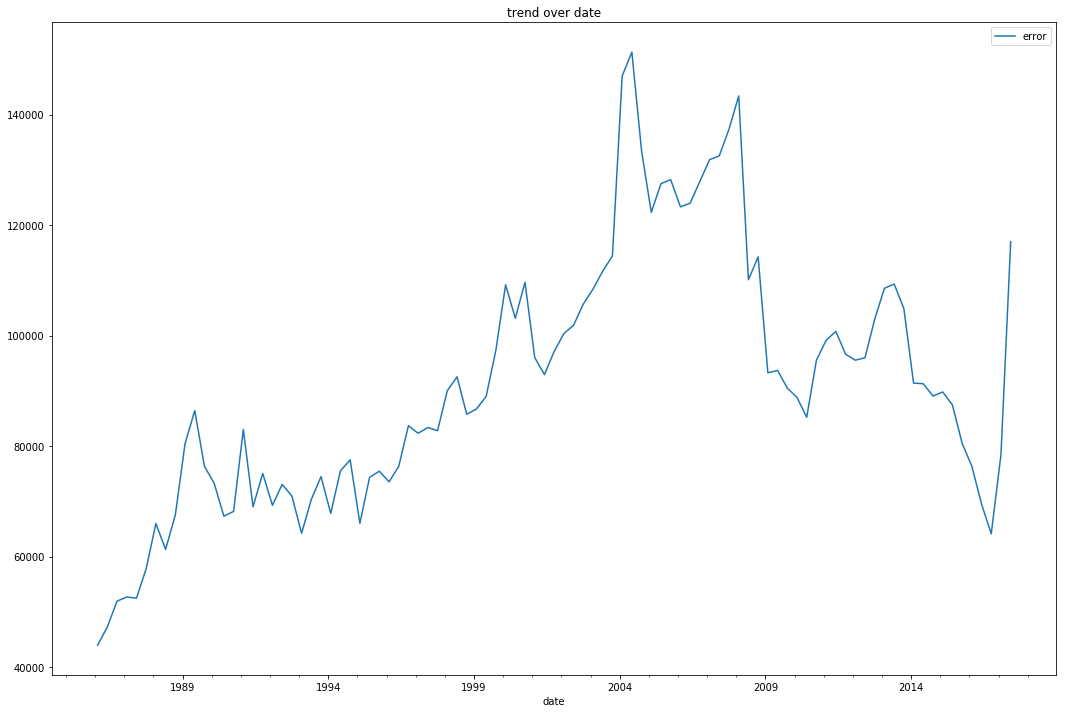

In [13]:
df_sum_12 = mr_full.summary()
plot_trends(df_sum_12, ['error'])

In [14]:
### regress with 4-month sliding window
mr_full.regress(df_all, sliding_window=4)

[dp] prediction - data shape: (26051, 17), period: 1985-10-01 ~ 1986-05-30, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 13403, 13403, 12648
[dp] validation step is skipped
[dp] training size: 13403
[dp] prediction - data shape: (29961, 17), period: 1986-02-03 ~ 1986-09-30, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 12263, 12263, 17698
[dp] validation step is skipped
[dp] training size: 12263
[dp] prediction - data shape: (35816, 17), period: 1986-06-02 ~ 1987-01-30, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 17698, 17698, 18118
[dp] validation step is skipped
[dp] training size: 17698
[dp] prediction - data shape: (33246, 17), period: 1986-10-01 ~ 1987-05-29, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 17763, 17763, 15483
[dp] validation step is skipped
[dp] training size: 17763
[dp] prediction - data shape: (33335, 17), period: 1987-02-02 ~ 1987-09-30, sliding(in month): 4, test: 4
[dp] track

[dp] track/sliding/test window size: 14924, 14924, 17883
[dp] validation step is skipped
[dp] training size: 14924
[dp] prediction - data shape: (31826, 17), period: 1998-06-01 ~ 1999-01-29, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 17442, 17442, 14384
[dp] validation step is skipped
[dp] training size: 17442
[dp] prediction - data shape: (30808, 17), period: 1998-10-01 ~ 1999-05-30, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 13943, 13943, 16865
[dp] validation step is skipped
[dp] training size: 13943
[dp] prediction - data shape: (35695, 17), period: 1999-02-01 ~ 1999-09-30, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 16865, 16865, 18830
[dp] validation step is skipped
[dp] training size: 16865
[dp] prediction - data shape: (33353, 17), period: 1999-06-01 ~ 2000-01-31, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 18830, 18830, 14523
[dp] validation step is skipped
[dp] training size: 18830
[

[dp] validation step is skipped
[dp] training size: 11422
[dp] prediction - data shape: (19778, 17), period: 2010-10-01 ~ 2011-05-31, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 9491, 9491, 10287
[dp] validation step is skipped
[dp] training size: 9491
[dp] prediction - data shape: (21432, 17), period: 2011-02-01 ~ 2011-09-30, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 10108, 10108, 11324
[dp] validation step is skipped
[dp] training size: 10108
[dp] prediction - data shape: (20882, 17), period: 2011-06-01 ~ 2012-01-31, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 11145, 11145, 9737
[dp] validation step is skipped
[dp] training size: 11145
[dp] prediction - data shape: (21122, 17), period: 2011-10-03 ~ 2012-05-31, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 9737, 9737, 11385
[dp] validation step is skipped
[dp] training size: 9737
[dp] prediction - data shape: (24040, 17), period: 2012-02-01 ~ 2

[43976.5131943247,
 47022.894083921274,
 54446.31280592243,
 54364.88461667377,
 52321.82649834702,
 57934.318925339394,
 66574.30728919824,
 61475.26066468218,
 65062.16406356966,
 76730.80640345882,
 79776.94889857368,
 73416.24891611468,
 72173.2996729165,
 68451.73162090924,
 70569.77328333906,
 81794.13334772609,
 72839.97454525618,
 76447.53611943606,
 77457.21196046029,
 73399.23593784074,
 72880.99909425605,
 68743.93655741346,
 73014.91205074801,
 76545.35996071067,
 70897.5266832006,
 76299.02733106186,
 78887.84187313438,
 74492.62074704068,
 76428.43357618847,
 78007.29705132032,
 73511.8092336708,
 80105.05174287359,
 84520.14203603512,
 83067.34631246097,
 83087.84064286425,
 85988.87420844543,
 92475.48159931831,
 92573.17808162783,
 84751.52969722183,
 87414.71696669351,
 90557.41307196312,
 98472.9567765404,
 108597.16560601482,
 102104.55015713938,
 108641.40946154356,
 97314.38921164951,
 93782.3785760298,
 100264.56949627378,
 104815.80675474979,
 102743.00615350743

[dp] data range: 1985-10-01 - 2017-09-27
[dp] sliding_windows: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[dp] errors: [43976.5131943247, 47022.894083921274, 54446.31280592243, 54364.88461667377, 52321.82649834702, 57934.318925339394, 66574.30728919824, 61475.26066468218, 65062.16406356966, 76730.80640345882, 79776.94889857368, 73416.24891611468, 72173.2996729165, 68451.73162090924, 70569.77328333906, 81794.13334772609, 72839.97454525618, 76447.53611943606, 77457.21196046029, 73399.23593784074, 72880.99909425605, 68743.93655741346, 73014.91205074801, 76545.35996071067, 70897.5266832006, 76299.02733106186, 78887.84187313438, 74492.62074704068, 76428.43357618847, 78007.29705132032, 73511.8092336708, 80105.05174287359, 84520.14203603512, 83067.346312

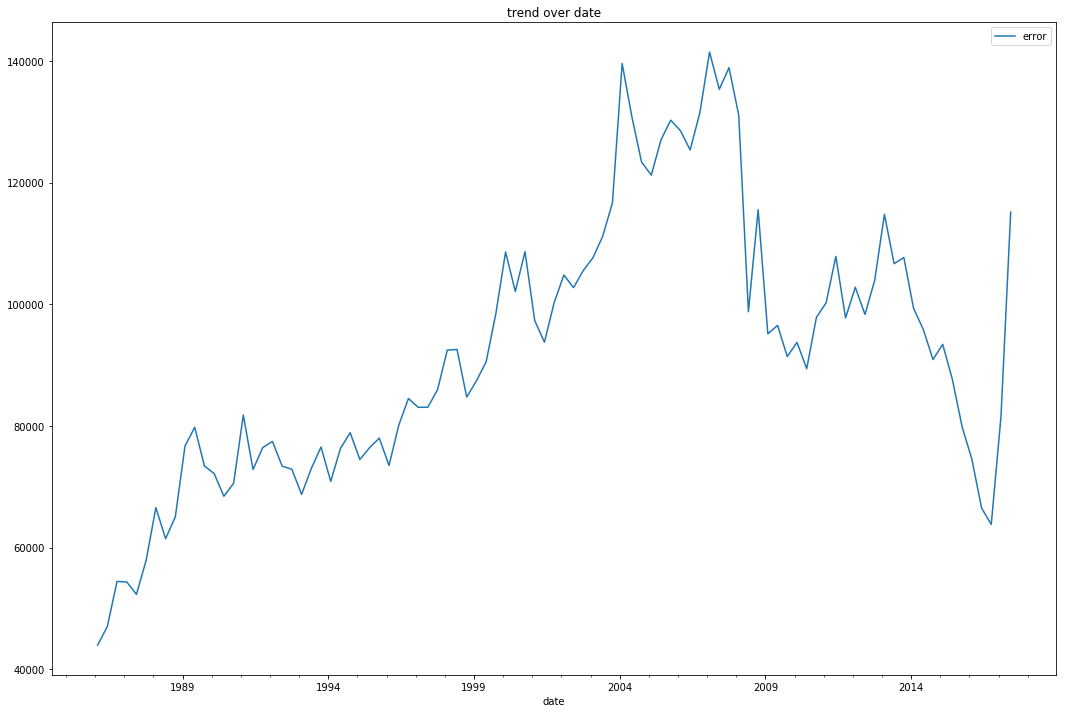

In [15]:
df_sum_4 = mr_full.summary()
plot_trends(df_sum_4, ['error'])

In [19]:
### validate sliding_window
mr_full.regress(df_all, param_grid=parameters, GridSearchCV={'verbose':True, 'n_jobs':-1})

[dp] prediction - data shape: (26051, 17), period: 1985-10-01 ~ 1986-05-30, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 13403, 13403, 12648
[dp] validation step is skipped
[dp] training size: 13403
[dp] prediction - data shape: (43749, 17), period: 1985-10-01 ~ 1986-09-30, sliding(in month): 8, test: 4
[dp] track/sliding/test window size: 26051, 26051, 17698
[dp] validation step is skipped
[dp] training size: 26051
[dp] prediction - data shape: (61867, 17), period: 1985-10-01 ~ 1987-01-30, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 43749, 43749, 18118
[dp] validation step is skipped
[dp] training size: 43749
[dp] prediction - data shape: (63207, 17), period: 1986-02-03 ~ 1987-05-29, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 47724, 47724, 15483
[dp] validation step is skipped
[dp] training size: 47724
[dp] prediction - data shape: (69151, 17), period: 1986-06-02 ~ 1987-09-30, sliding(in month): 12, test: 4
[dp] tr

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.9s finished
[dp] validation - sliding(in month):4, score: -2432692112.547437
[dp] validation - data shape: (110216, 17), sliding(in month): 8, period: 1985-10-01 ~ 1988-01-31
[dp] track/sliding/test window size: 95202, 26051, 15014
[dp] walk-forward train:(26051,), test:(15014,), scope:0 ~ 41064
[dp] walk-forward train:(26051,), test:(15014,), scope:15014 ~ 56078
[dp] walk-forward train:(26051,), test:(15014,), scope:30028 ~ 71092
[dp] walk-forward train:(26051,), test:(15014,), scope:45042 ~ 86106
[dp] training size: 95202


Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    8.5s remaining:    8.5s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    9.3s finished
[dp] validation - sliding(in month):8, score: -2499199348.598236
[dp] validation - data shape: (110216, 17), sliding(in month): 12, period: 1985-10-01 ~ 1988-01-31
[dp] track/sliding/test window size: 95202, 43749, 15014
[dp] walk-forward train:(43749,), test:(15014,), scope:0 ~ 58762
[dp] walk-forward train:(43749,), test:(15014,), scope:15014 ~ 73776
[dp] walk-forward train:(43749,), test:(15014,), scope:30028 ~ 88790
[dp] training size: 95202


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.2s finished
[dp] validation - sliding(in month):12, score: -2487935568.791562
[dp] prediction - data shape: (33221, 17), period: 1987-06-01 ~ 1988-01-31, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 18207, 18207, 15014
[dp] validation step is skipped
[dp] training size: 18207
[dp] prediction - data shape: (30695, 17), period: 1987-10-01 ~ 1988-05-31, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 15014, 15014, 15681
[dp] validation step is skipped
[dp] training size: 15014
[dp] prediction - data shape: (37290, 17), period: 1988-02-01 ~ 1988-09-30, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 15431, 15431, 21859
[dp] validation step is skipped
[dp] training size: 15431
[dp] prediction - data shape: (40106, 17), period: 1988-06-01 ~ 1989-01-31, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 21609, 21609, 18497
[dp] validation step is skipped
[dp] 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.4s finished
[dp] validation - sliding(in month):4, score: -4405127365.537791
[dp] validation - data shape: (121269, 17), sliding(in month): 8, period: 1987-10-01 ~ 1990-01-31
[dp] track/sliding/test window size: 106083, 30695, 15186
[dp] walk-forward train:(30695,), test:(15186,), scope:0 ~ 45880
[dp] walk-forward train:(30695,), test:(15186,), scope:15186 ~ 61066
[dp] walk-forward train:(30695,), test:(15186,), scope:30372 ~ 76252
[dp] walk-forward train:(30695,), test:(15186,), scope:45558 ~ 91438
[dp] training size: 106083


Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    9.1s remaining:    9.1s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    9.9s finished
[dp] validation - sliding(in month):8, score: -4426638494.739366
[dp] validation - data shape: (121269, 17), sliding(in month): 12, period: 1987-10-01 ~ 1990-01-31
[dp] track/sliding/test window size: 106083, 52304, 15186
[dp] walk-forward train:(52304,), test:(15186,), scope:0 ~ 67489
[dp] walk-forward train:(52304,), test:(15186,), scope:15186 ~ 82675
[dp] walk-forward train:(52304,), test:(15186,), scope:30372 ~ 97861
[dp] training size: 106083


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   11.6s finished
[dp] validation - sliding(in month):12, score: -5465440739.6275835
[dp] prediction - data shape: (33243, 17), period: 1989-06-01 ~ 1990-01-31, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 18057, 18057, 15186
[dp] validation step is skipped
[dp] training size: 18057
[dp] prediction - data shape: (28808, 17), period: 1989-10-02 ~ 1990-05-31, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 15186, 15186, 13622
[dp] validation step is skipped
[dp] training size: 15186
[dp] prediction - data shape: (26991, 17), period: 1990-02-01 ~ 1990-09-28, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 13034, 13034, 13957
[dp] validation step is skipped
[dp] training size: 13034
[dp] prediction - data shape: (22587, 17), period: 1990-06-01 ~ 1991-01-31, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 13369, 13369, 9218
[dp] validation step is skipped
[dp] 

Fitting 6 folds for each of 1 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    8.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    8.0s finished
[dp] validation - sliding(in month):4, score: -5251001880.892931
[dp] validation - data shape: (82430, 17), sliding(in month): 8, period: 1989-10-02 ~ 1992-01-31
[dp] track/sliding/test window size: 73281, 29122, 9149
[dp] walk-forward train:(29122,), test:(9149,), scope:0 ~ 38270
[dp] walk-forward train:(29122,), test:(9149,), scope:9149 ~ 47419
[dp] walk-forward train:(29122,), test:(9149,), scope:18298 ~ 56568
[dp] walk-forward train:(29122,), test:(9149,), scope:27447 ~ 65717
[dp] training size: 73281


Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    8.4s remaining:    8.4s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    9.3s finished
[dp] validation - sliding(in month):8, score: -5264338768.136841
[dp] validation - data shape: (82430, 17), sliding(in month): 12, period: 1989-10-02 ~ 1992-01-31
[dp] track/sliding/test window size: 73281, 42313, 9149
[dp] walk-forward train:(42313,), test:(9149,), scope:0 ~ 51461
[dp] walk-forward train:(42313,), test:(9149,), scope:9149 ~ 60610
[dp] walk-forward train:(42313,), test:(9149,), scope:18298 ~ 69759
[dp] training size: 73281


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.8s finished
[dp] validation - sliding(in month):12, score: -5407583685.051001
[dp] prediction - data shape: (20705, 17), period: 1991-06-03 ~ 1992-01-31, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 11556, 11556, 9149
[dp] validation step is skipped
[dp] training size: 11556
[dp] prediction - data shape: (19254, 17), period: 1991-10-01 ~ 1992-05-29, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 8830, 8830, 10424
[dp] validation step is skipped
[dp] training size: 8830
[dp] prediction - data shape: (20174, 17), period: 1992-02-03 ~ 1992-09-30, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 10105, 10105, 10069
[dp] validation step is skipped
[dp] training size: 10105
[dp] prediction - data shape: (19237, 17), period: 1992-06-01 ~ 1993-01-30, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 10069, 10069, 9168
[dp] validation step is skipped
[dp] train

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    3.4s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.3s finished
[dp] validation - sliding(in month):4, score: -5505806291.310549
[dp] validation - data shape: (68101, 17), sliding(in month): 8, period: 1991-10-01 ~ 1994-01-31
[dp] track/sliding/test window size: 58154, 19254, 9947
[dp] walk-forward train:(19254,), test:(9947,), scope:0 ~ 29200
[dp] walk-forward train:(19254,), test:(9947,), scope:9947 ~ 39147
[dp] walk-forward train:(19254,), test:(9947,), scope:19894 ~ 49094
[dp] training size: 58154


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.7s finished
[dp] validation - sliding(in month):8, score: -5340089678.263594
[dp] validation - data shape: (68101, 17), sliding(in month): 12, period: 1991-10-01 ~ 1994-01-31
[dp] track/sliding/test window size: 58154, 29323, 9947
[dp] walk-forward train:(29323,), test:(9947,), scope:0 ~ 39269
[dp] walk-forward train:(29323,), test:(9947,), scope:9947 ~ 49216
[dp] training size: 58154


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    5.4s finished
[dp] validation - sliding(in month):12, score: -4750515186.1239605
[dp] prediction - data shape: (38778, 17), period: 1992-10-01 ~ 1994-01-31, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 28831, 28831, 9947
[dp] validation step is skipped
[dp] training size: 28831
[dp] prediction - data shape: (40973, 17), period: 1993-02-01 ~ 1994-05-31, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 29610, 29610, 11363
[dp] validation step is skipped
[dp] training size: 29610
[dp] prediction - data shape: (43789, 17), period: 1993-06-01 ~ 1994-09-30, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 31825, 31825, 11964
[dp] validation step is skipped
[dp] training size: 31825
[dp] prediction - data shape: (41593, 17), period: 1993-10-01 ~ 1995-01-31, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 33045, 33045, 8548
[dp] validation step is skipped
[d

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.3s finished
[dp] validation - sliding(in month):4, score: -5620762575.599433
[dp] validation - data shape: (69057, 17), sliding(in month): 8, period: 1993-10-01 ~ 1996-01-31
[dp] track/sliding/test window size: 60059, 21310, 8998
[dp] walk-forward train:(21310,), test:(8998,), scope:0 ~ 30307
[dp] walk-forward train:(21310,), test:(8998,), scope:8998 ~ 39305
[dp] walk-forward train:(21310,), test:(8998,), scope:17996 ~ 48303
[dp] walk-forward train:(21310,), test:(8998,), scope:26994 ~ 57301
[dp] training size: 60059


Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    7.1s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    8.0s finished
[dp] validation - sliding(in month):8, score: -5432387645.044645
[dp] validation - data shape: (69057, 17), sliding(in month): 12, period: 1993-10-01 ~ 1996-01-31
[dp] track/sliding/test window size: 60059, 33045, 8998
[dp] walk-forward train:(33045,), test:(8998,), scope:0 ~ 42042
[dp] walk-forward train:(33045,), test:(8998,), scope:8998 ~ 51040
[dp] walk-forward train:(33045,), test:(8998,), scope:17996 ~ 60038
[dp] training size: 60059


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    9.1s finished
[dp] validation - sliding(in month):12, score: -5205811286.390984
[dp] prediction - data shape: (36012, 17), period: 1994-10-03 ~ 1996-01-31, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 27014, 27014, 8998
[dp] validation step is skipped
[dp] training size: 27014
[dp] prediction - data shape: (37993, 17), period: 1995-02-01 ~ 1996-05-31, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 27464, 27464, 10529
[dp] validation step is skipped
[dp] training size: 27464
[dp] prediction - data shape: (40956, 17), period: 1995-06-01 ~ 1996-09-30, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 29349, 29349, 11607
[dp] validation step is skipped
[dp] training size: 29349
[dp] prediction - data shape: (40845, 17), period: 1995-10-02 ~ 1997-01-31, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 30699, 30699, 10146
[dp] validation step is skipped
[d

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    3.9s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.8s finished
[dp] validation - sliding(in month):4, score: -6569533966.73598
[dp] validation - data shape: (78951, 17), sliding(in month): 8, period: 1995-10-02 ~ 1998-01-30
[dp] track/sliding/test window size: 66224, 19527, 12727
[dp] walk-forward train:(19527,), test:(12727,), scope:0 ~ 32253
[dp] walk-forward train:(19527,), test:(12727,), scope:12727 ~ 44980
[dp] walk-forward train:(19527,), test:(12727,), scope:25454 ~ 57707
[dp] training size: 66224


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.0s finished
[dp] validation - sliding(in month):8, score: -6727132952.745265
[dp] validation - data shape: (78951, 17), sliding(in month): 12, period: 1995-10-02 ~ 1998-01-30
[dp] track/sliding/test window size: 66224, 30819, 12727
[dp] walk-forward train:(30819,), test:(12727,), scope:0 ~ 43545
[dp] walk-forward train:(30819,), test:(12727,), scope:12727 ~ 56272
[dp] training size: 66224


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    5.7s finished
[dp] validation - sliding(in month):12, score: -6847220205.515295
[dp] prediction - data shape: (26803, 17), period: 1997-06-02 ~ 1998-01-30, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 14076, 14076, 12727
[dp] validation step is skipped
[dp] training size: 14076
[dp] prediction - data shape: (27651, 17), period: 1997-10-01 ~ 1998-05-29, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 12349, 12349, 15302
[dp] validation step is skipped
[dp] training size: 12349
[dp] prediction - data shape: (32807, 17), period: 1998-02-02 ~ 1998-09-30, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 14924, 14924, 17883
[dp] validation step is skipped
[dp] training size: 14924
[dp] prediction - data shape: (31826, 17), period: 1998-06-01 ~ 1999-01-29, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 17442, 17442, 14384
[dp] validation step is skipped
[dp] 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.5s finished
[dp] validation - sliding(in month):4, score: -8133203981.896853
[dp] validation - data shape: (109695, 17), sliding(in month): 8, period: 1997-10-01 ~ 2000-01-31
[dp] track/sliding/test window size: 95172, 27651, 14523
[dp] walk-forward train:(27651,), test:(14523,), scope:0 ~ 42173
[dp] walk-forward train:(27651,), test:(14523,), scope:14523 ~ 56696
[dp] walk-forward train:(27651,), test:(14523,), scope:29046 ~ 71219
[dp] walk-forward train:(27651,), test:(14523,), scope:43569 ~ 85742
[dp] training size: 95172


Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    8.4s remaining:    8.4s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    9.2s finished
[dp] validation - sliding(in month):8, score: -7681540739.691169
[dp] validation - data shape: (109695, 17), sliding(in month): 12, period: 1997-10-01 ~ 2000-01-31
[dp] track/sliding/test window size: 95172, 45534, 14523
[dp] walk-forward train:(45534,), test:(14523,), scope:0 ~ 60056
[dp] walk-forward train:(45534,), test:(14523,), scope:14523 ~ 74579
[dp] walk-forward train:(45534,), test:(14523,), scope:29046 ~ 89102
[dp] training size: 95172


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.2s finished
[dp] validation - sliding(in month):12, score: -7558450906.186707
[dp] prediction - data shape: (64161, 17), period: 1998-10-01 ~ 2000-01-31, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 49638, 49638, 14523
[dp] validation step is skipped
[dp] training size: 49638
[dp] prediction - data shape: (66845, 17), period: 1999-02-01 ~ 2000-05-31, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 50218, 50218, 16627
[dp] validation step is skipped
[dp] training size: 50218
[dp] prediction - data shape: (67285, 17), period: 1999-06-01 ~ 2000-09-29, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 49208, 49208, 18077
[dp] validation step is skipped
[dp] training size: 49208
[dp] prediction - data shape: (63065, 17), period: 1999-10-01 ~ 2001-01-31, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 48455, 48455, 14610
[dp] validation step is skipped
[

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.7s finished
[dp] validation - sliding(in month):4, score: -10500196802.068167
[dp] validation - data shape: (109798, 17), sliding(in month): 8, period: 1999-10-01 ~ 2002-01-31
[dp] track/sliding/test window size: 95827, 31150, 13971
[dp] walk-forward train:(31150,), test:(13971,), scope:0 ~ 45120
[dp] walk-forward train:(31150,), test:(13971,), scope:13971 ~ 59091
[dp] walk-forward train:(31150,), test:(13971,), scope:27942 ~ 73062
[dp] walk-forward train:(31150,), test:(13971,), scope:41913 ~ 87033
[dp] training size: 95827


Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    8.5s remaining:    8.5s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    9.5s finished
[dp] validation - sliding(in month):8, score: -9787180070.676273
[dp] validation - data shape: (109798, 17), sliding(in month): 12, period: 1999-10-01 ~ 2002-01-31
[dp] track/sliding/test window size: 95827, 48455, 13971
[dp] walk-forward train:(48455,), test:(13971,), scope:0 ~ 62425
[dp] walk-forward train:(48455,), test:(13971,), scope:13971 ~ 76396
[dp] walk-forward train:(48455,), test:(13971,), scope:27942 ~ 90367
[dp] training size: 95827


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.5s finished
[dp] validation - sliding(in month):12, score: -9778797945.495476
[dp] prediction - data shape: (61343, 17), period: 2000-10-02 ~ 2002-01-31, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 47372, 47372, 13971
[dp] validation step is skipped
[dp] training size: 47372
[dp] prediction - data shape: (65004, 17), period: 2001-02-01 ~ 2002-05-31, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 46733, 46733, 18271
[dp] validation step is skipped
[dp] training size: 46733
[dp] prediction - data shape: (68527, 17), period: 2001-06-01 ~ 2002-09-30, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 49344, 49344, 19183
[dp] validation step is skipped
[dp] training size: 49344
[dp] prediction - data shape: (66551, 17), period: 2001-10-01 ~ 2003-01-31, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 50845, 50845, 15706
[dp] validation step is skipped
[

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.5s finished
[dp] validation - sliding(in month):4, score: -11519097812.62254
[dp] validation - data shape: (122534, 17), sliding(in month): 8, period: 2001-10-01 ~ 2004-01-30
[dp] track/sliding/test window size: 104581, 32242, 17953
[dp] walk-forward train:(32242,), test:(17953,), scope:0 ~ 50194
[dp] walk-forward train:(32242,), test:(17953,), scope:17953 ~ 68147
[dp] walk-forward train:(32242,), test:(17953,), scope:35906 ~ 86100
[dp] walk-forward train:(32242,), test:(17953,), scope:53859 ~ 104053
[dp] training size: 104581


Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    9.6s remaining:    9.6s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   10.1s finished
[dp] validation - sliding(in month):8, score: -10824381599.348461
[dp] validation - data shape: (122534, 17), sliding(in month): 12, period: 2001-10-01 ~ 2004-01-30
[dp] track/sliding/test window size: 104581, 50845, 17953
[dp] walk-forward train:(50845,), test:(17953,), scope:0 ~ 68797
[dp] walk-forward train:(50845,), test:(17953,), scope:17953 ~ 86750
[dp] training size: 104581


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    8.1s finished
[dp] validation - sliding(in month):12, score: -11376507580.318525
[dp] prediction - data shape: (55983, 17), period: 2003-02-03 ~ 2004-01-30, sliding(in month): 8, test: 4
[dp] track/sliding/test window size: 38030, 38030, 17953
[dp] validation step is skipped
[dp] training size: 38030
[dp] prediction - data shape: (58963, 17), period: 2003-06-02 ~ 2004-05-28, sliding(in month): 8, test: 4
[dp] track/sliding/test window size: 38456, 38456, 20507
[dp] validation step is skipped
[dp] training size: 38456
[dp] prediction - data shape: (59616, 17), period: 2003-10-01 ~ 2004-09-30, sliding(in month): 8, test: 4
[dp] track/sliding/test window size: 37858, 37858, 21758
[dp] validation step is skipped
[dp] training size: 37858
[dp] prediction - data shape: (58579, 17), period: 2004-02-02 ~ 2005-01-31, sliding(in month): 8, test: 4
[dp] track/sliding/test window size: 41663, 41663, 16916
[dp] validation step is skipped
[dp]

Fitting 6 folds for each of 1 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    8.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    8.3s finished
[dp] validation - sliding(in month):4, score: -16115252179.178034
[dp] validation - data shape: (129391, 17), sliding(in month): 8, period: 2003-10-01 ~ 2006-01-31
[dp] track/sliding/test window size: 114978, 37858, 14413
[dp] walk-forward train:(37858,), test:(14413,), scope:0 ~ 52270
[dp] walk-forward train:(37858,), test:(14413,), scope:14413 ~ 66683
[dp] walk-forward train:(37858,), test:(14413,), scope:28826 ~ 81096
[dp] walk-forward train:(37858,), test:(14413,), scope:43239 ~ 95509
[dp] walk-forward train:(37858,), test:(14413,), scope:57652 ~ 109922
[dp] training size: 114978


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.4s finished
[dp] validation - sliding(in month):8, score: -15608053166.152826
[dp] validation - data shape: (129391, 17), sliding(in month): 12, period: 2003-10-01 ~ 2006-01-31
[dp] track/sliding/test window size: 114978, 59616, 14413
[dp] walk-forward train:(59616,), test:(14413,), scope:0 ~ 74028
[dp] walk-forward train:(59616,), test:(14413,), scope:14413 ~ 88441
[dp] walk-forward train:(59616,), test:(14413,), scope:28826 ~ 102854
[dp] training size: 114978


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   12.5s finished
[dp] validation - sliding(in month):12, score: -15814731723.567589
[dp] prediction - data shape: (52859, 17), period: 2005-02-01 ~ 2006-01-31, sliding(in month): 8, test: 4
[dp] track/sliding/test window size: 38446, 38446, 14413
[dp] validation step is skipped
[dp] training size: 38446
[dp] prediction - data shape: (48253, 17), period: 2005-06-01 ~ 2006-05-31, sliding(in month): 8, test: 4
[dp] track/sliding/test window size: 34454, 34454, 13799
[dp] validation step is skipped
[dp] training size: 34454
[dp] prediction - data shape: (41373, 17), period: 2005-10-03 ~ 2006-09-29, sliding(in month): 8, test: 4
[dp] track/sliding/test window size: 27602, 27602, 13771
[dp] validation step is skipped
[dp] training size: 27602
[dp] prediction - data shape: (38338, 17), period: 2006-02-01 ~ 2007-01-31, sliding(in month): 8, test: 4
[dp] track/sliding/test window size: 26960, 26960, 11378
[dp] validation step is skipped
[dp]

Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    9.6s finished
[dp] validation - sliding(in month):4, score: -16367157379.22181
[dp] validation - data shape: (81094, 17), sliding(in month): 8, period: 2005-10-03 ~ 2008-01-31
[dp] track/sliding/test window size: 74031, 28581, 7063
[dp] walk-forward train:(28581,), test:(7063,), scope:0 ~ 35643
[dp] walk-forward train:(28581,), test:(7063,), scope:7063 ~ 42706
[dp] walk-forward train:(28581,), test:(7063,), scope:14126 ~ 49769
[dp] walk-forward train:(28581,), test:(7063,), scope:21189 ~ 56832
[dp] walk-forward train:(28581,), test:(7063,), scope:28252 ~ 63895
[dp] walk-forward train:(28581,), test:(7063,), scope:35315 ~ 70958
[dp] training size: 74031


Fitting 6 folds for each of 1 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   12.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   12.3s finished
[dp] validation - sliding(in month):8, score: -15901246721.471523
[dp] validation - data shape: (81094, 17), sliding(in month): 12, period: 2005-10-03 ~ 2008-01-31
[dp] track/sliding/test window size: 74031, 41486, 7063
[dp] walk-forward train:(41486,), test:(7063,), scope:0 ~ 48548
[dp] walk-forward train:(41486,), test:(7063,), scope:7063 ~ 55611
[dp] walk-forward train:(41486,), test:(7063,), scope:14126 ~ 62674
[dp] walk-forward train:(41486,), test:(7063,), scope:21189 ~ 69737
[dp] training size: 74031


Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:   11.0s remaining:   11.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   12.2s finished
[dp] validation - sliding(in month):12, score: -15824383401.321547
[dp] prediction - data shape: (39721, 17), period: 2006-10-02 ~ 2008-01-31, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 32658, 32658, 7063
[dp] validation step is skipped
[dp] training size: 32658
[dp] prediction - data shape: (36932, 17), period: 2007-02-01 ~ 2008-05-30, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 28189, 28189, 8743
[dp] validation step is skipped
[dp] training size: 28189
[dp] prediction - data shape: (37276, 17), period: 2007-06-01 ~ 2008-09-30, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 25776, 25776, 11500
[dp] validation step is skipped
[dp] training size: 25776
[dp] prediction - data shape: (37915, 17), period: 2007-10-01 ~ 2009-01-30, sliding(in month): 12, test: 4
[dp] track

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    3.3s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.1s finished
[dp] validation - sliding(in month):4, score: -11145061944.640957
[dp] validation - data shape: (72669, 17), sliding(in month): 8, period: 2007-10-01 ~ 2010-01-29
[dp] track/sliding/test window size: 60925, 15652, 11744
[dp] walk-forward train:(15652,), test:(11744,), scope:0 ~ 27395
[dp] walk-forward train:(15652,), test:(11744,), scope:11744 ~ 39139
[dp] walk-forward train:(15652,), test:(11744,), scope:23488 ~ 50883
[dp] training size: 60925


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.1s finished
[dp] validation - sliding(in month):8, score: -10560928675.378391
[dp] validation - data shape: (72669, 17), sliding(in month): 12, period: 2007-10-01 ~ 2010-01-29
[dp] track/sliding/test window size: 60925, 27152, 11744
[dp] walk-forward train:(27152,), test:(11744,), scope:0 ~ 38895
[dp] walk-forward train:(27152,), test:(11744,), scope:11744 ~ 50639
[dp] training size: 60925


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    5.1s finished
[dp] validation - sliding(in month):12, score: -10615346053.885647
[dp] prediction - data shape: (34754, 17), period: 2009-02-02 ~ 2010-01-29, sliding(in month): 8, test: 4
[dp] track/sliding/test window size: 23010, 23010, 11744
[dp] validation step is skipped
[dp] training size: 23010
[dp] prediction - data shape: (35476, 17), period: 2009-06-01 ~ 2010-05-28, sliding(in month): 8, test: 4
[dp] track/sliding/test window size: 23792, 23792, 11684
[dp] validation step is skipped
[dp] training size: 23792
[dp] prediction - data shape: (34187, 17), period: 2009-10-01 ~ 2010-09-30, sliding(in month): 8, test: 4
[dp] track/sliding/test window size: 22765, 22765, 11422
[dp] validation step is skipped
[dp] training size: 22765
[dp] prediction - data shape: (32310, 17), period: 2010-02-01 ~ 2011-01-31, sliding(in month): 8, test: 4
[dp] track/sliding/test window size: 22819, 22819, 9491
[dp] validation step is skipped
[dp] 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.4s finished
[dp] validation - sliding(in month):4, score: -9141203402.051676
[dp] validation - data shape: (74847, 17), sliding(in month): 8, period: 2009-10-01 ~ 2012-01-31
[dp] track/sliding/test window size: 65110, 22765, 9737
[dp] walk-forward train:(22765,), test:(9737,), scope:0 ~ 32501
[dp] walk-forward train:(22765,), test:(9737,), scope:9737 ~ 42238
[dp] walk-forward train:(22765,), test:(9737,), scope:19474 ~ 51975
[dp] walk-forward train:(22765,), test:(9737,), scope:29211 ~ 61712
[dp] training size: 65110


Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    7.1s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    7.9s finished
[dp] validation - sliding(in month):8, score: -8892488630.297173
[dp] validation - data shape: (74847, 17), sliding(in month): 12, period: 2009-10-01 ~ 2012-01-31
[dp] track/sliding/test window size: 65110, 34187, 9737
[dp] walk-forward train:(34187,), test:(9737,), scope:0 ~ 43923
[dp] walk-forward train:(34187,), test:(9737,), scope:9737 ~ 53660
[dp] walk-forward train:(34187,), test:(9737,), scope:19474 ~ 63397
[dp] training size: 65110


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    8.3s finished
[dp] validation - sliding(in month):12, score: -9469092571.403784
[dp] prediction - data shape: (31169, 17), period: 2011-02-01 ~ 2012-01-31, sliding(in month): 8, test: 4
[dp] track/sliding/test window size: 21432, 21432, 9737
[dp] validation step is skipped
[dp] training size: 21432
[dp] prediction - data shape: (32267, 17), period: 2011-06-01 ~ 2012-05-31, sliding(in month): 8, test: 4
[dp] track/sliding/test window size: 20882, 20882, 11385
[dp] validation step is skipped
[dp] training size: 20882
[dp] prediction - data shape: (33777, 17), period: 2011-10-03 ~ 2012-09-28, sliding(in month): 8, test: 4
[dp] track/sliding/test window size: 20508, 20508, 13269
[dp] validation step is skipped
[dp] training size: 20508
[dp] prediction - data shape: (35656, 17), period: 2012-02-01 ~ 2013-01-31, sliding(in month): 8, test: 4
[dp] track/sliding/test window size: 24040, 24040, 11616
[dp] validation step is skipped
[dp] t

Fitting 6 folds for each of 1 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    6.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    6.4s finished
[dp] validation - sliding(in month):4, score: -11160134930.701014
[dp] validation - data shape: (81369, 17), sliding(in month): 8, period: 2011-10-03 ~ 2014-01-31
[dp] track/sliding/test window size: 71284, 21315, 10085
[dp] walk-forward train:(21315,), test:(10085,), scope:0 ~ 31399
[dp] walk-forward train:(21315,), test:(10085,), scope:10085 ~ 41484
[dp] walk-forward train:(21315,), test:(10085,), scope:20170 ~ 51569
[dp] walk-forward train:(21315,), test:(10085,), scope:30255 ~ 61654
[dp] training size: 71284


Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    6.8s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    7.9s finished
[dp] validation - sliding(in month):8, score: -10566510102.11086
[dp] validation - data shape: (81369, 17), sliding(in month): 12, period: 2011-10-03 ~ 2014-01-31
[dp] track/sliding/test window size: 71284, 33990, 10085
[dp] walk-forward train:(33990,), test:(10085,), scope:0 ~ 44074
[dp] walk-forward train:(33990,), test:(10085,), scope:10085 ~ 54159
[dp] walk-forward train:(33990,), test:(10085,), scope:20170 ~ 64244
[dp] training size: 71284


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    8.2s finished
[dp] validation - sliding(in month):12, score: -10956346529.197857
[dp] prediction - data shape: (35976, 17), period: 2013-02-01 ~ 2014-01-31, sliding(in month): 8, test: 4
[dp] track/sliding/test window size: 25891, 25891, 10085
[dp] validation step is skipped
[dp] training size: 25891
[dp] prediction - data shape: (33953, 17), period: 2013-06-03 ~ 2014-05-30, sliding(in month): 8, test: 4
[dp] track/sliding/test window size: 23262, 23262, 10691
[dp] validation step is skipped
[dp] training size: 23262
[dp] prediction - data shape: (31812, 17), period: 2013-10-01 ~ 2014-09-30, sliding(in month): 8, test: 4
[dp] track/sliding/test window size: 20579, 20579, 11233
[dp] validation step is skipped
[dp] training size: 20579
[dp] prediction - data shape: (28474, 17), period: 2014-02-03 ~ 2015-01-30, sliding(in month): 8, test: 4
[dp] track/sliding/test window size: 21727, 21727, 6747
[dp] validation step is skipped
[dp] 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.1s finished
[dp] validation - sliding(in month):4, score: -8807544938.820114
[dp] validation - data shape: (73256, 17), sliding(in month): 8, period: 2013-10-01 ~ 2016-01-29
[dp] track/sliding/test window size: 63282, 20579, 9974
[dp] walk-forward train:(20579,), test:(9974,), scope:0 ~ 30552
[dp] walk-forward train:(20579,), test:(9974,), scope:9974 ~ 40526
[dp] walk-forward train:(20579,), test:(9974,), scope:19948 ~ 50500
[dp] walk-forward train:(20579,), test:(9974,), scope:29922 ~ 60474
[dp] training size: 63282


Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    6.3s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    7.2s finished
[dp] validation - sliding(in month):8, score: -8008362753.740054
[dp] validation - data shape: (73256, 17), sliding(in month): 12, period: 2013-10-01 ~ 2016-01-29
[dp] track/sliding/test window size: 63282, 31812, 9974
[dp] walk-forward train:(31812,), test:(9974,), scope:0 ~ 41785
[dp] walk-forward train:(31812,), test:(9974,), scope:9974 ~ 51759
[dp] walk-forward train:(31812,), test:(9974,), scope:19948 ~ 61733
[dp] training size: 63282


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.9s finished
[dp] validation - sliding(in month):12, score: -7723068585.66082
[dp] prediction - data shape: (41444, 17), period: 2014-10-01 ~ 2016-01-29, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 31470, 31470, 9974
[dp] validation step is skipped
[dp] training size: 31470
[dp] prediction - data shape: (46431, 17), period: 2015-02-02 ~ 2016-05-31, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 34697, 34697, 11734
[dp] validation step is skipped
[dp] training size: 34697
[dp] prediction - data shape: (48063, 17), period: 2015-06-01 ~ 2016-09-30, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 34582, 34582, 13481
[dp] validation step is skipped
[dp] training size: 34582
[dp] prediction - data shape: (45134, 17), period: 2015-10-01 ~ 2017-01-31, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 34715, 34715, 10419
[dp] validation step is skipped
[dp

[43976.5131943247,
 47258.108516511435,
 51938.43130005982,
 52697.61388399104,
 52469.42535143521,
 57546.51762204806,
 66574.30728919824,
 61475.26066468218,
 65062.16406356966,
 76730.80640345882,
 79776.94889857368,
 72143.3532896779,
 72173.2996729165,
 68451.73162090922,
 70569.77328333906,
 81794.13334772609,
 72839.97454525618,
 76310.32054399865,
 77457.21196046029,
 73399.23593784074,
 72880.99909425605,
 68743.93655741346,
 73014.91205074801,
 74284.23330501227,
 67845.87885902674,
 75533.88347148789,
 77519.7135729078,
 66025.6173919984,
 74367.10625383297,
 74691.61670982368,
 73542.13355548852,
 76345.40536627048,
 83708.63052235862,
 82330.75581368966,
 83374.72473666971,
 84976.10667023038,
 92475.48159931831,
 92573.17808162783,
 84751.52969722183,
 87414.71696669351,
 90557.41307196312,
 95728.509079206,
 109216.55934316186,
 103161.93046414742,
 109664.62544280181,
 96044.99254010318,
 92961.21241685604,
 96003.6733095036,
 100374.8257721562,
 101894.35908631417,
 10

[dp] data range: 1985-10-01 - 2017-09-27
[dp] sliding_windows: [4, 8, 12, 12, 12, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 4, 4, 4, 4, 4, 4, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 12, 12, 12, 12, 12, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 12, 12, 12, 12, 12]
[dp] errors: [43976.5131943247, 47258.108516511435, 51938.43130005982, 52697.61388399104, 52469.42535143521, 57546.51762204806, 66574.30728919824, 61475.26066468218, 65062.16406356966, 76730.80640345882, 79776.94889857368, 72143.3532896779, 72173.2996729165, 68451.73162090922, 70569.77328333906, 81794.13334772609, 72839.97454525618, 76310.32054399865, 77457.21196046029, 73399.23593784074, 72880.99909425605, 68743.93655741346, 73014.91205074801, 74284.23330501227, 67845.87885902674, 75533.88347148789, 77519.7135729078, 66025.6173919984, 74367.10625383297, 74691.61670982368, 73542.13355548852, 76345.4053662

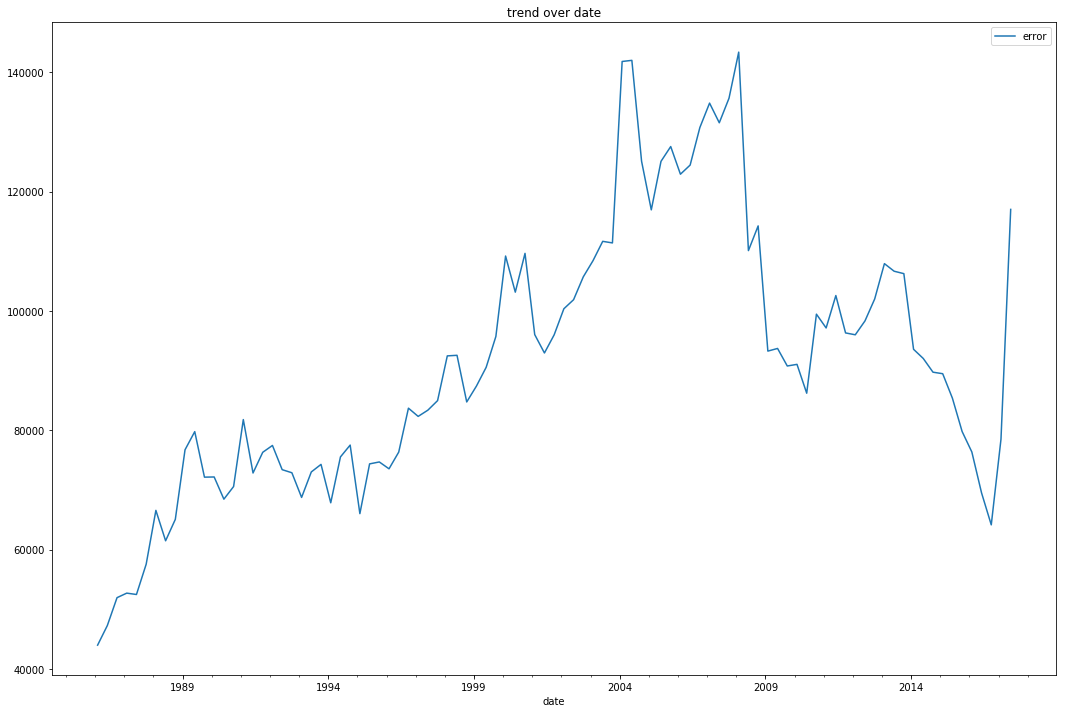

In [20]:
df_sum_auto = mr_full.summary()
plot_trends(df_sum_auto, ['error'])

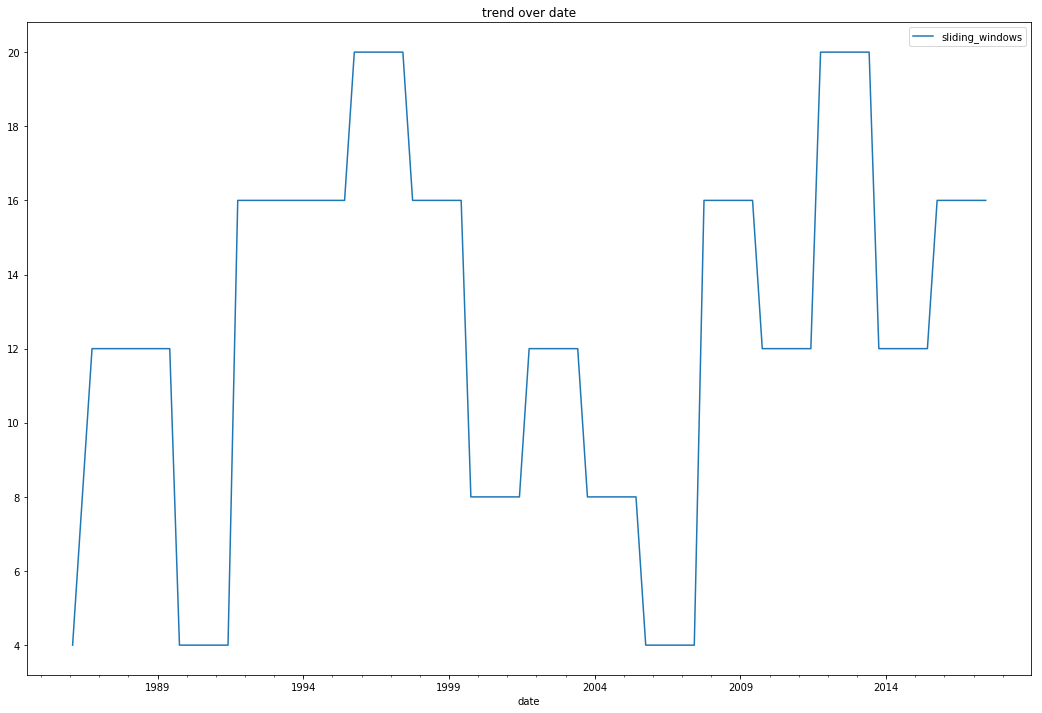

In [18]:
plot_trends(df_sum_auto, ['sliding_windows'])

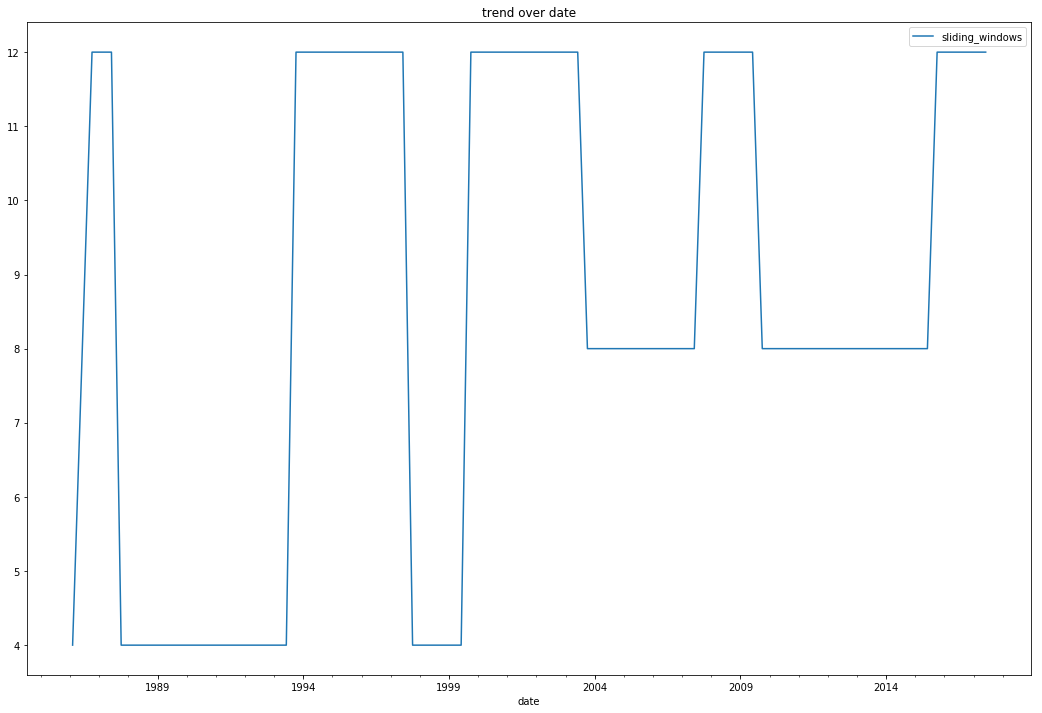

In [21]:
plot_trends(df_sum_auto, ['sliding_windows'])

In [22]:
df_all_clean = pp.dataset(feature='delivered', valid=True, clean=True, date=('1985-10-01', '2017-10-01'))
mr_full.regress(df_all_clean, sliding_window=4)

[dp] transforming date
[dp] transforming view
[dp] transforming pool
[dp] transforming impr_over_land
[dp] transforming sold_year
[dp] transforming sold_month
[dp] transforming sold_age
[dp] transforming eval
[dp] transforming eval_sqft_price
[dp] making sqft_zip_avg
[dp] making sqft_over_zip_avg
[dp] making sqft_price_zip_avg
[dp] making sold_price_zip_avg
[dp] making eval_zip_avg
[dp] making eval_over_zip_avg
[dp] making sale_count_zip
[dp] cleaning on criteria: sold_price
[dp] cleaning on criteria: sqft_price
[dp] cleaning on criteria: sqft
[dp] cleaning on criteria: num_bed
[dp] cleaning on criteria: num_bath
[dp] cleaning on criteria: lon
[dp] prediction - data shape: (25885, 17), period: 1985-10-01 ~ 1986-05-30, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 13312, 13312, 12573
[dp] validation step is skipped
[dp] training size: 13312
[dp] prediction - data shape: (29809, 17), period: 1986-02-03 ~ 1986-09-30, sliding(in month): 4, test: 4
[dp] track/sliding/te

[dp] track/sliding/test window size: 11251, 11251, 14026
[dp] validation step is skipped
[dp] training size: 11251
[dp] prediction - data shape: (26696, 17), period: 1997-06-02 ~ 1998-01-30, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 14026, 14026, 12670
[dp] validation step is skipped
[dp] training size: 14026
[dp] prediction - data shape: (27538, 17), period: 1997-10-01 ~ 1998-05-29, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 12295, 12295, 15243
[dp] validation step is skipped
[dp] training size: 12295
[dp] prediction - data shape: (32691, 17), period: 1998-02-02 ~ 1998-09-30, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 14868, 14868, 17823
[dp] validation step is skipped
[dp] training size: 14868
[dp] prediction - data shape: (31739, 17), period: 1998-06-01 ~ 1999-01-29, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 17383, 17383, 14356
[dp] validation step is skipped
[dp] training size: 17383
[

[dp] validation step is skipped
[dp] training size: 12117
[dp] prediction - data shape: (22405, 17), period: 2009-10-01 ~ 2010-05-28, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 10913, 10913, 11492
[dp] validation step is skipped
[dp] training size: 10913
[dp] prediction - data shape: (22487, 17), period: 2010-02-01 ~ 2010-09-30, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 11208, 11208, 11279
[dp] validation step is skipped
[dp] training size: 11208
[dp] prediction - data shape: (20649, 17), period: 2010-06-01 ~ 2011-01-31, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 11279, 11279, 9370
[dp] validation step is skipped
[dp] training size: 11279
[dp] prediction - data shape: (19523, 17), period: 2010-10-01 ~ 2011-05-31, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 9370, 9370, 10153
[dp] validation step is skipped
[dp] training size: 9370
[dp] prediction - data shape: (21153, 17), period: 2011-02-01 

[43525.49703139017,
 45052.97597375978,
 51544.01002324705,
 53415.79622510092,
 52032.59513444781,
 57226.791691073566,
 63797.658889168175,
 59427.174031740375,
 65001.9819437894,
 75408.84524248615,
 76764.75091876065,
 70180.62187691731,
 67943.62614715332,
 66895.21791085096,
 69874.8584038614,
 77721.6727563139,
 71511.57488162002,
 76270.51922156055,
 73609.5405700518,
 72410.40896915953,
 67605.59864710513,
 67096.71790265787,
 73023.85290589092,
 74328.143219514,
 69186.79894032647,
 72177.32395857871,
 76494.66276998825,
 71751.18539547447,
 74268.69053912393,
 77045.14673491959,
 74890.04851629736,
 76564.79017930811,
 81778.9804139082,
 83205.2844335864,
 81119.15529872624,
 81717.66411638871,
 92061.01671211811,
 90474.5697480682,
 83816.42350416687,
 85454.44332251808,
 88113.5263657823,
 94071.32852300946,
 105110.53589650869,
 98864.98053347858,
 100557.76495097751,
 94076.71997922222,
 91637.83133782234,
 91238.30973268251,
 100440.17620675977,
 98759.31399218288,
 987

[dp] data range: 1985-10-01 - 2017-09-27
[dp] sliding_windows: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[dp] errors: [43525.49703139017, 45052.97597375978, 51544.01002324705, 53415.79622510092, 52032.59513444781, 57226.791691073566, 63797.658889168175, 59427.174031740375, 65001.9819437894, 75408.84524248615, 76764.75091876065, 70180.62187691731, 67943.62614715332, 66895.21791085096, 69874.8584038614, 77721.6727563139, 71511.57488162002, 76270.51922156055, 73609.5405700518, 72410.40896915953, 67605.59864710513, 67096.71790265787, 73023.85290589092, 74328.143219514, 69186.79894032647, 72177.32395857871, 76494.66276998825, 71751.18539547447, 74268.69053912393, 77045.14673491959, 74890.04851629736, 76564.79017930811, 81778.9804139082, 83205.28443358

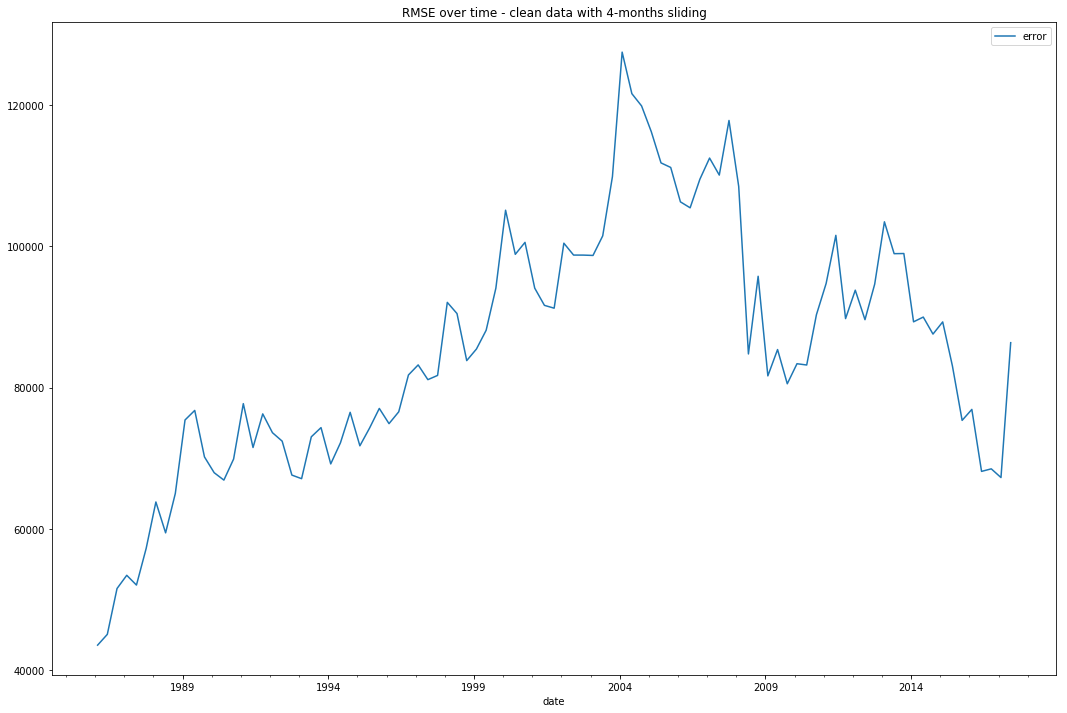

In [25]:
df_sum_4_clean = mr_full.summary()
plot_trends(df_sum_4_clean, ['error'], title='RMSE over time - clean data with 4-months sliding')

In [32]:
mr_full.regress(df_all_clean, param_grid=parameters, GridSearchCV={'verbose':True, 'n_jobs':-1})

[dp] prediction - data shape: (25885, 17), period: 1985-10-01 ~ 1986-05-30, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 13312, 13312, 12573
[dp] training size: 13312
[dp] prediction - data shape: (43505, 17), period: 1985-10-01 ~ 1986-09-30, sliding(in month): 8, test: 4
[dp] track/sliding/test window size: 25885, 25885, 17620
[dp] training size: 25885
[dp] prediction - data shape: (61565, 17), period: 1985-10-01 ~ 1987-01-30, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 43505, 43505, 18060
[dp] training size: 43505
[dp] prediction - data shape: (62964, 17), period: 1986-02-03 ~ 1987-05-29, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 47514, 47514, 15450
[dp] training size: 47514
[dp] prediction - data shape: (68939, 17), period: 1986-06-02 ~ 1987-09-30, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 50775, 50775, 18164
[dp] training size: 50775
[dp] validation - data shape: (109798, 17), sliding(

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.1s finished
[dp] validation - sliding(in month):4, score: -2285405173.0279784
[dp] validation - data shape: (109798, 17), sliding(in month): 8, period: 1985-10-01 ~ 1988-01-31
[dp] track/sliding/test window size: 94824, 25885, 14974
[dp] walk-forward train:(25885,), test:(14974,), scope:0 ~ 40858
[dp] walk-forward train:(25885,), test:(14974,), scope:14974 ~ 55832
[dp] walk-forward train:(25885,), test:(14974,), scope:29948 ~ 70806
[dp] walk-forward train:(25885,), test:(14974,), scope:44922 ~ 85780
[dp] training size: 94824


Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    7.5s remaining:    7.5s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    8.2s finished
[dp] validation - sliding(in month):8, score: -2339094722.5148735
[dp] validation - data shape: (109798, 17), sliding(in month): 12, period: 1985-10-01 ~ 1988-01-31
[dp] track/sliding/test window size: 94824, 43505, 14974
[dp] walk-forward train:(43505,), test:(14974,), scope:0 ~ 58478
[dp] walk-forward train:(43505,), test:(14974,), scope:14974 ~ 73452
[dp] walk-forward train:(43505,), test:(14974,), scope:29948 ~ 88426
[dp] training size: 94824


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    9.5s finished
[dp] validation - sliding(in month):12, score: -2288469269.5623026
[dp] prediction - data shape: (33138, 17), period: 1987-06-01 ~ 1988-01-31, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 18164, 18164, 14974
[dp] training size: 18164
[dp] prediction - data shape: (30597, 17), period: 1987-10-01 ~ 1988-05-31, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 14974, 14974, 15623
[dp] training size: 14974
[dp] prediction - data shape: (37169, 17), period: 1988-02-01 ~ 1988-09-30, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 15373, 15373, 21796
[dp] training size: 15373
[dp] prediction - data shape: (39963, 17), period: 1988-06-01 ~ 1989-01-31, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 21546, 21546, 18417
[dp] training size: 21546
[dp] prediction - data shape: (35483, 17), period: 1988-10-03 ~ 1989-05-31, sliding(in month): 4, test: 4


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.8s finished
[dp] validation - sliding(in month):4, score: -4291688883.490527
[dp] validation - data shape: (120715, 17), sliding(in month): 8, period: 1987-10-01 ~ 1990-01-31
[dp] track/sliding/test window size: 105601, 30597, 15114
[dp] walk-forward train:(30597,), test:(15114,), scope:0 ~ 45710
[dp] walk-forward train:(30597,), test:(15114,), scope:15114 ~ 60824
[dp] walk-forward train:(30597,), test:(15114,), scope:30228 ~ 75938
[dp] walk-forward train:(30597,), test:(15114,), scope:45342 ~ 91052
[dp] training size: 105601


Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    8.2s remaining:    8.2s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    9.4s finished
[dp] validation - sliding(in month):8, score: -4249049166.7012467
[dp] validation - data shape: (120715, 17), sliding(in month): 12, period: 1987-10-01 ~ 1990-01-31
[dp] track/sliding/test window size: 105601, 52143, 15114
[dp] walk-forward train:(52143,), test:(15114,), scope:0 ~ 67256
[dp] walk-forward train:(52143,), test:(15114,), scope:15114 ~ 82370
[dp] walk-forward train:(52143,), test:(15114,), scope:30228 ~ 97484
[dp] training size: 105601


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   11.5s finished
[dp] validation - sliding(in month):12, score: -5348924464.440082
[dp] prediction - data shape: (50155, 17), period: 1989-02-01 ~ 1990-01-31, sliding(in month): 8, test: 4
[dp] track/sliding/test window size: 35041, 35041, 15114
[dp] training size: 35041
[dp] prediction - data shape: (46655, 17), period: 1989-06-01 ~ 1990-05-31, sliding(in month): 8, test: 4
[dp] track/sliding/test window size: 33089, 33089, 13566
[dp] training size: 33089
[dp] prediction - data shape: (42015, 17), period: 1989-10-02 ~ 1990-09-28, sliding(in month): 8, test: 4
[dp] track/sliding/test window size: 28094, 28094, 13921
[dp] training size: 28094
[dp] prediction - data shape: (36101, 17), period: 1990-02-01 ~ 1991-01-31, sliding(in month): 8, test: 4
[dp] track/sliding/test window size: 26901, 26901, 9200
[dp] training size: 26901
[dp] prediction - data shape: (32833, 17), period: 1990-06-01 ~ 1991-05-31, sliding(in month): 8, test: 4
[d

Fitting 6 folds for each of 1 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    7.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    7.6s finished
[dp] validation - sliding(in month):4, score: -4837019475.825619
[dp] validation - data shape: (82165, 17), sliding(in month): 8, period: 1989-10-02 ~ 1992-01-31
[dp] track/sliding/test window size: 73041, 28994, 9124
[dp] walk-forward train:(28994,), test:(9124,), scope:0 ~ 38117
[dp] walk-forward train:(28994,), test:(9124,), scope:9124 ~ 47241
[dp] walk-forward train:(28994,), test:(9124,), scope:18248 ~ 56365
[dp] walk-forward train:(28994,), test:(9124,), scope:27372 ~ 65489
[dp] training size: 73041


Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    8.0s remaining:    8.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    8.8s finished
[dp] validation - sliding(in month):8, score: -5010249152.140048
[dp] validation - data shape: (82165, 17), sliding(in month): 12, period: 1989-10-02 ~ 1992-01-31
[dp] track/sliding/test window size: 73041, 42150, 9124
[dp] walk-forward train:(42150,), test:(9124,), scope:0 ~ 51273
[dp] walk-forward train:(42150,), test:(9124,), scope:9124 ~ 60397
[dp] walk-forward train:(42150,), test:(9124,), scope:18248 ~ 69521
[dp] training size: 73041


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    9.4s finished
[dp] validation - sliding(in month):12, score: -5053272534.049315
[dp] prediction - data shape: (20652, 17), period: 1991-06-03 ~ 1992-01-31, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 11528, 11528, 9124
[dp] training size: 11528
[dp] prediction - data shape: (19194, 17), period: 1991-10-01 ~ 1992-05-29, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 8807, 8807, 10387
[dp] training size: 8807
[dp] prediction - data shape: (20113, 17), period: 1992-02-03 ~ 1992-09-30, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 10070, 10070, 10043
[dp] training size: 10070
[dp] prediction - data shape: (19154, 17), period: 1992-06-01 ~ 1993-01-30, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 10043, 10043, 9111
[dp] training size: 10043
[dp] prediction - data shape: (17991, 17), period: 1992-10-01 ~ 1993-05-28, sliding(in month): 4, test: 4
[dp] t

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    3.4s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.2s finished
[dp] validation - sliding(in month):4, score: -4984041778.278324
[dp] validation - data shape: (67848, 17), sliding(in month): 8, period: 1991-10-01 ~ 1994-01-31
[dp] track/sliding/test window size: 57938, 19194, 9910
[dp] walk-forward train:(19194,), test:(9910,), scope:0 ~ 29103
[dp] walk-forward train:(19194,), test:(9910,), scope:9910 ~ 39013
[dp] walk-forward train:(19194,), test:(9910,), scope:19820 ~ 48923
[dp] training size: 57938


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.6s finished
[dp] validation - sliding(in month):8, score: -4861970670.172389
[dp] validation - data shape: (67848, 17), sliding(in month): 12, period: 1991-10-01 ~ 1994-01-31
[dp] track/sliding/test window size: 57938, 29237, 9910
[dp] walk-forward train:(29237,), test:(9910,), scope:0 ~ 39146
[dp] walk-forward train:(29237,), test:(9910,), scope:9910 ~ 49056
[dp] training size: 57938


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    5.3s finished
[dp] validation - sliding(in month):12, score: -4258502484.5734854
[dp] prediction - data shape: (38611, 17), period: 1992-10-01 ~ 1994-01-31, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 28701, 28701, 9910
[dp] training size: 28701
[dp] prediction - data shape: (40830, 17), period: 1993-02-01 ~ 1994-05-31, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 29500, 29500, 11330
[dp] training size: 29500
[dp] prediction - data shape: (43652, 17), period: 1993-06-01 ~ 1994-09-30, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 31721, 31721, 11931
[dp] training size: 31721
[dp] prediction - data shape: (41458, 17), period: 1993-10-01 ~ 1995-01-31, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 32942, 32942, 8516
[dp] training size: 32942
[dp] prediction - data shape: (39721, 17), period: 1994-02-01 ~ 1995-05-31, sliding(in month): 12, test:

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.7s finished
[dp] validation - sliding(in month):4, score: -5096039747.370519
[dp] validation - data shape: (68810, 17), sliding(in month): 8, period: 1993-10-01 ~ 1996-01-31
[dp] track/sliding/test window size: 59855, 21240, 8955
[dp] walk-forward train:(21240,), test:(8955,), scope:0 ~ 30194
[dp] walk-forward train:(21240,), test:(8955,), scope:8955 ~ 39149
[dp] walk-forward train:(21240,), test:(8955,), scope:17910 ~ 48104
[dp] walk-forward train:(21240,), test:(8955,), scope:26865 ~ 57059
[dp] training size: 59855


Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    6.4s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    7.3s finished
[dp] validation - sliding(in month):8, score: -4993882494.581641
[dp] validation - data shape: (68810, 17), sliding(in month): 12, period: 1993-10-01 ~ 1996-01-31
[dp] track/sliding/test window size: 59855, 32942, 8955
[dp] walk-forward train:(32942,), test:(8955,), scope:0 ~ 41896
[dp] walk-forward train:(32942,), test:(8955,), scope:8955 ~ 50851
[dp] walk-forward train:(32942,), test:(8955,), scope:17910 ~ 59806
[dp] training size: 59855


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.8s finished
[dp] validation - sliding(in month):12, score: -4944261695.331376
[dp] prediction - data shape: (35868, 17), period: 1994-10-03 ~ 1996-01-31, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 26913, 26913, 8955
[dp] training size: 26913
[dp] prediction - data shape: (37836, 17), period: 1995-02-01 ~ 1996-05-31, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 27352, 27352, 10484
[dp] training size: 27352
[dp] prediction - data shape: (40795, 17), period: 1995-06-01 ~ 1996-09-30, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 29229, 29229, 11566
[dp] training size: 29229
[dp] prediction - data shape: (40682, 17), period: 1995-10-02 ~ 1997-01-31, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 30571, 30571, 10111
[dp] training size: 30571
[dp] prediction - data shape: (42978, 17), period: 1996-02-01 ~ 1997-05-30, sliding(in month): 12, test:

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    3.4s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.3s finished
[dp] validation - sliding(in month):4, score: -6461371484.049432
[dp] validation - data shape: (78629, 17), sliding(in month): 8, period: 1995-10-02 ~ 1998-01-30
[dp] track/sliding/test window size: 65959, 19439, 12670
[dp] walk-forward train:(19439,), test:(12670,), scope:0 ~ 32108
[dp] walk-forward train:(19439,), test:(12670,), scope:12670 ~ 44778
[dp] walk-forward train:(19439,), test:(12670,), scope:25340 ~ 57448
[dp] training size: 65959


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.6s finished
[dp] validation - sliding(in month):8, score: -6614285230.094624
[dp] validation - data shape: (78629, 17), sliding(in month): 12, period: 1995-10-02 ~ 1998-01-30
[dp] track/sliding/test window size: 65959, 30690, 12670
[dp] walk-forward train:(30690,), test:(12670,), scope:0 ~ 43359
[dp] walk-forward train:(30690,), test:(12670,), scope:12670 ~ 56029
[dp] training size: 65959


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    6.0s finished
[dp] validation - sliding(in month):12, score: -6709171857.423345
[dp] prediction - data shape: (26696, 17), period: 1997-06-02 ~ 1998-01-30, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 14026, 14026, 12670
[dp] training size: 14026
[dp] prediction - data shape: (27538, 17), period: 1997-10-01 ~ 1998-05-29, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 12295, 12295, 15243
[dp] training size: 12295
[dp] prediction - data shape: (32691, 17), period: 1998-02-02 ~ 1998-09-30, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 14868, 14868, 17823
[dp] training size: 14868
[dp] prediction - data shape: (31739, 17), period: 1998-06-01 ~ 1999-01-29, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 17383, 17383, 14356
[dp] training size: 17383
[dp] prediction - data shape: (30743, 17), period: 1998-10-01 ~ 1999-05-30, sliding(in month): 4, test: 4
[

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.4s finished
[dp] validation - sliding(in month):4, score: -7699219418.849942
[dp] validation - data shape: (109364, 17), sliding(in month): 8, period: 1997-10-01 ~ 2000-01-31
[dp] track/sliding/test window size: 94873, 27538, 14491
[dp] walk-forward train:(27538,), test:(14491,), scope:0 ~ 42028
[dp] walk-forward train:(27538,), test:(14491,), scope:14491 ~ 56519
[dp] walk-forward train:(27538,), test:(14491,), scope:28982 ~ 71010
[dp] walk-forward train:(27538,), test:(14491,), scope:43473 ~ 85501
[dp] training size: 94873


Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    7.8s remaining:    7.8s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    8.6s finished
[dp] validation - sliding(in month):8, score: -7277596849.341095
[dp] validation - data shape: (109364, 17), sliding(in month): 12, period: 1997-10-01 ~ 2000-01-31
[dp] track/sliding/test window size: 94873, 45361, 14491
[dp] walk-forward train:(45361,), test:(14491,), scope:0 ~ 59851
[dp] walk-forward train:(45361,), test:(14491,), scope:14491 ~ 74342
[dp] walk-forward train:(45361,), test:(14491,), scope:28982 ~ 88833
[dp] training size: 94873


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.2s finished
[dp] validation - sliding(in month):12, score: -7172987963.785784
[dp] prediction - data shape: (64003, 17), period: 1998-10-01 ~ 2000-01-31, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 49512, 49512, 14491
[dp] training size: 49512
[dp] prediction - data shape: (66682, 17), period: 1999-02-01 ~ 2000-05-31, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 50087, 50087, 16595
[dp] training size: 50087
[dp] prediction - data shape: (67135, 17), period: 1999-06-01 ~ 2000-09-29, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 49085, 49085, 18050
[dp] training size: 49085
[dp] prediction - data shape: (62933, 17), period: 1999-10-01 ~ 2001-01-31, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 48366, 48366, 14567
[dp] training size: 48366
[dp] prediction - data shape: (63475, 17), period: 2000-02-01 ~ 2001-05-31, sliding(in month): 12, test

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.1s finished
[dp] validation - sliding(in month):4, score: -9546016951.803679
[dp] validation - data shape: (109520, 17), sliding(in month): 8, period: 1999-10-01 ~ 2002-01-31
[dp] track/sliding/test window size: 95601, 31086, 13919
[dp] walk-forward train:(31086,), test:(13919,), scope:0 ~ 45004
[dp] walk-forward train:(31086,), test:(13919,), scope:13919 ~ 58923
[dp] walk-forward train:(31086,), test:(13919,), scope:27838 ~ 72842
[dp] walk-forward train:(31086,), test:(13919,), scope:41757 ~ 86761
[dp] training size: 95601


Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    9.9s remaining:    9.9s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   10.5s finished
[dp] validation - sliding(in month):8, score: -8938408887.659948
[dp] validation - data shape: (109520, 17), sliding(in month): 12, period: 1999-10-01 ~ 2002-01-31
[dp] track/sliding/test window size: 95601, 48366, 13919
[dp] walk-forward train:(48366,), test:(13919,), scope:0 ~ 62284
[dp] walk-forward train:(48366,), test:(13919,), scope:13919 ~ 76203
[dp] walk-forward train:(48366,), test:(13919,), scope:27838 ~ 90122
[dp] training size: 95601


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   11.0s finished
[dp] validation - sliding(in month):12, score: -8792793604.335726
[dp] prediction - data shape: (61154, 17), period: 2000-10-02 ~ 2002-01-31, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 47235, 47235, 13919
[dp] training size: 47235
[dp] prediction - data shape: (64787, 17), period: 2001-02-01 ~ 2002-05-31, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 46587, 46587, 18200
[dp] training size: 46587
[dp] prediction - data shape: (68227, 17), period: 2001-06-01 ~ 2002-09-30, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 49176, 49176, 19051
[dp] training size: 49176
[dp] prediction - data shape: (66181, 17), period: 2001-10-01 ~ 2003-01-31, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 50592, 50592, 15589
[dp] training size: 50592
[dp] prediction - data shape: (68981, 17), period: 2002-02-01 ~ 2003-05-30, sliding(in month): 12, test

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.6s finished
[dp] validation - sliding(in month):4, score: -9996528764.866741
[dp] validation - data shape: (120805, 17), sliding(in month): 8, period: 2001-10-01 ~ 2004-01-30
[dp] track/sliding/test window size: 103555, 32119, 17250
[dp] walk-forward train:(32119,), test:(17250,), scope:0 ~ 49368
[dp] walk-forward train:(32119,), test:(17250,), scope:17250 ~ 66618
[dp] walk-forward train:(32119,), test:(17250,), scope:34500 ~ 83868
[dp] walk-forward train:(32119,), test:(17250,), scope:51750 ~ 101118
[dp] training size: 103555


Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    8.7s remaining:    8.7s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    9.5s finished
[dp] validation - sliding(in month):8, score: -9736793040.225136
[dp] validation - data shape: (120805, 17), sliding(in month): 12, period: 2001-10-01 ~ 2004-01-30
[dp] track/sliding/test window size: 103555, 50592, 17250
[dp] walk-forward train:(50592,), test:(17250,), scope:0 ~ 67841
[dp] walk-forward train:(50592,), test:(17250,), scope:17250 ~ 85091
[dp] walk-forward train:(50592,), test:(17250,), scope:34500 ~ 102341
[dp] training size: 103555


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.8s finished
[dp] validation - sliding(in month):12, score: -10142714967.258253
[dp] prediction - data shape: (54624, 17), period: 2003-02-03 ~ 2004-01-30, sliding(in month): 8, test: 4
[dp] track/sliding/test window size: 37374, 37374, 17250
[dp] training size: 37374
[dp] prediction - data shape: (55644, 17), period: 2003-06-02 ~ 2004-05-28, sliding(in month): 8, test: 4
[dp] track/sliding/test window size: 37328, 37328, 18316
[dp] training size: 37328
[dp] prediction - data shape: (51929, 17), period: 2003-10-01 ~ 2004-09-30, sliding(in month): 8, test: 4
[dp] track/sliding/test window size: 34989, 34989, 16940
[dp] training size: 34989
[dp] prediction - data shape: (47491, 17), period: 2004-02-02 ~ 2005-01-31, sliding(in month): 8, test: 4
[dp] track/sliding/test window size: 34679, 34679, 12812
[dp] training size: 34679
[dp] prediction - data shape: (42836, 17), period: 2004-06-01 ~ 2005-05-31, sliding(in month): 8, test: 4


Fitting 7 folds for each of 1 candidates, totalling 7 fits


[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    8.7s finished
[dp] validation - sliding(in month):4, score: -13656367593.732706
[dp] validation - data shape: (101218, 17), sliding(in month): 8, period: 2003-10-01 ~ 2006-01-31
[dp] track/sliding/test window size: 91198, 34989, 10020
[dp] walk-forward train:(34989,), test:(10020,), scope:0 ~ 45008
[dp] walk-forward train:(34989,), test:(10020,), scope:10020 ~ 55028
[dp] walk-forward train:(34989,), test:(10020,), scope:20040 ~ 65048
[dp] walk-forward train:(34989,), test:(10020,), scope:30060 ~ 75068
[dp] walk-forward train:(34989,), test:(10020,), scope:40080 ~ 85088
[dp] training size: 91198


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.7s finished
[dp] validation - sliding(in month):8, score: -13503173184.141243
[dp] validation - data shape: (101218, 17), sliding(in month): 12, period: 2003-10-01 ~ 2006-01-31
[dp] track/sliding/test window size: 91198, 51929, 10020
[dp] walk-forward train:(51929,), test:(10020,), scope:0 ~ 61948
[dp] walk-forward train:(51929,), test:(10020,), scope:10020 ~ 71968
[dp] walk-forward train:(51929,), test:(10020,), scope:20040 ~ 81988
[dp] training size: 91198


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.8s finished
[dp] validation - sliding(in month):12, score: -13859096295.489223
[dp] prediction - data shape: (36477, 17), period: 2005-02-01 ~ 2006-01-31, sliding(in month): 8, test: 4
[dp] track/sliding/test window size: 26457, 26457, 10020
[dp] training size: 26457
[dp] prediction - data shape: (33179, 17), period: 2005-06-01 ~ 2006-05-31, sliding(in month): 8, test: 4
[dp] track/sliding/test window size: 23393, 23393, 9786
[dp] training size: 23393
[dp] prediction - data shape: (29169, 17), period: 2005-10-03 ~ 2006-09-29, sliding(in month): 8, test: 4
[dp] track/sliding/test window size: 19385, 19385, 9784
[dp] training size: 19385
[dp] prediction - data shape: (28011, 17), period: 2006-02-01 ~ 2007-01-31, sliding(in month): 8, test: 4
[dp] track/sliding/test window size: 19149, 19149, 8862
[dp] training size: 19149
[dp] prediction - data shape: (27188, 17), period: 2006-06-01 ~ 2007-05-31, sliding(in month): 8, test: 4
[dp

Fitting 7 folds for each of 1 candidates, totalling 7 fits


[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    6.6s finished
[dp] validation - sliding(in month):4, score: -11667476404.507235
[dp] validation - data shape: (61747, 17), sliding(in month): 8, period: 2005-10-03 ~ 2008-01-31
[dp] track/sliding/test window size: 55411, 20055, 6336
[dp] walk-forward train:(20055,), test:(6336,), scope:0 ~ 26390
[dp] walk-forward train:(20055,), test:(6336,), scope:6336 ~ 32726
[dp] walk-forward train:(20055,), test:(6336,), scope:12672 ~ 39062
[dp] walk-forward train:(20055,), test:(6336,), scope:19008 ~ 45398
[dp] walk-forward train:(20055,), test:(6336,), scope:25344 ~ 51734
[dp] training size: 55411


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.6s finished
[dp] validation - sliding(in month):8, score: -11327140108.266266
[dp] validation - data shape: (61747, 17), sliding(in month): 12, period: 2005-10-03 ~ 2008-01-31
[dp] track/sliding/test window size: 55411, 29253, 6336
[dp] walk-forward train:(29253,), test:(6336,), scope:0 ~ 35588
[dp] walk-forward train:(29253,), test:(6336,), scope:6336 ~ 41924
[dp] walk-forward train:(29253,), test:(6336,), scope:12672 ~ 48260
[dp] walk-forward train:(29253,), test:(6336,), scope:19008 ~ 54596
[dp] training size: 55411


Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    7.7s remaining:    7.7s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    8.6s finished
[dp] validation - sliding(in month):12, score: -11503556688.7181
[dp] prediction - data shape: (23716, 17), period: 2007-02-01 ~ 2008-01-31, sliding(in month): 8, test: 4
[dp] track/sliding/test window size: 17380, 17380, 6336
[dp] training size: 17380
[dp] prediction - data shape: (22845, 17), period: 2007-06-01 ~ 2008-05-30, sliding(in month): 8, test: 4
[dp] track/sliding/test window size: 14620, 14620, 8225
[dp] training size: 14620
[dp] prediction - data shape: (25489, 17), period: 2007-10-01 ~ 2008-09-30, sliding(in month): 8, test: 4
[dp] track/sliding/test window size: 14428, 14428, 11061
[dp] training size: 14428
[dp] prediction - data shape: (29724, 17), period: 2008-02-01 ~ 2009-01-30, sliding(in month): 8, test: 4
[dp] track/sliding/test window size: 19153, 19153, 10571
[dp] training size: 19153
[dp] prediction - data shape:

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    3.3s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.0s finished
[dp] validation - sliding(in month):4, score: -8392593482.721354
[dp] validation - data shape: (70284, 17), sliding(in month): 8, period: 2007-10-01 ~ 2010-01-29
[dp] track/sliding/test window size: 58715, 14428, 11569
[dp] walk-forward train:(14428,), test:(11569,), scope:0 ~ 25996
[dp] walk-forward train:(14428,), test:(11569,), scope:11569 ~ 37565
[dp] walk-forward train:(14428,), test:(11569,), scope:23138 ~ 49134
[dp] training size: 58715


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.8s finished
[dp] validation - sliding(in month):8, score: -7957208188.423142
[dp] validation - data shape: (70284, 17), sliding(in month): 12, period: 2007-10-01 ~ 2010-01-29
[dp] track/sliding/test window size: 58715, 25489, 11569
[dp] walk-forward train:(25489,), test:(11569,), scope:0 ~ 37057
[dp] walk-forward train:(25489,), test:(11569,), scope:11569 ~ 48626
[dp] training size: 58715


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    4.9s finished
[dp] validation - sliding(in month):12, score: -8037776866.888703
[dp] prediction - data shape: (34224, 17), period: 2009-02-02 ~ 2010-01-29, sliding(in month): 8, test: 4
[dp] track/sliding/test window size: 22655, 22655, 11569
[dp] training size: 22655
[dp] prediction - data shape: (34894, 17), period: 2009-06-01 ~ 2010-05-28, sliding(in month): 8, test: 4
[dp] track/sliding/test window size: 23402, 23402, 11492
[dp] training size: 23402
[dp] prediction - data shape: (33684, 17), period: 2009-10-01 ~ 2010-09-30, sliding(in month): 8, test: 4
[dp] track/sliding/test window size: 22405, 22405, 11279
[dp] training size: 22405
[dp] prediction - data shape: (31857, 17), period: 2010-02-01 ~ 2011-01-31, sliding(in month): 8, test: 4
[dp] track/sliding/test window size: 22487, 22487, 9370
[dp] training size: 22487
[dp] prediction - data shape: (30802, 17), period: 2010-06-01 ~ 2011-05-31, sliding(in month): 8, test: 4
[d

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.0s finished
[dp] validation - sliding(in month):4, score: -7600618890.647798
[dp] validation - data shape: (73861, 17), sliding(in month): 8, period: 2009-10-01 ~ 2012-01-31
[dp] track/sliding/test window size: 64207, 22405, 9654
[dp] walk-forward train:(22405,), test:(9654,), scope:0 ~ 32058
[dp] walk-forward train:(22405,), test:(9654,), scope:9654 ~ 41712
[dp] walk-forward train:(22405,), test:(9654,), scope:19308 ~ 51366
[dp] walk-forward train:(22405,), test:(9654,), scope:28962 ~ 61020
[dp] training size: 64207


Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    6.8s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    7.7s finished
[dp] validation - sliding(in month):8, score: -7645745419.4956
[dp] validation - data shape: (73861, 17), sliding(in month): 12, period: 2009-10-01 ~ 2012-01-31
[dp] track/sliding/test window size: 64207, 33684, 9654
[dp] walk-forward train:(33684,), test:(9654,), scope:0 ~ 43337
[dp] walk-forward train:(33684,), test:(9654,), scope:9654 ~ 52991
[dp] walk-forward train:(33684,), test:(9654,), scope:19308 ~ 62645
[dp] training size: 64207


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.9s finished
[dp] validation - sliding(in month):12, score: -7927590134.46018
[dp] prediction - data shape: (20654, 17), period: 2011-06-01 ~ 2012-01-31, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 11000, 11000, 9654
[dp] training size: 11000
[dp] prediction - data shape: (20895, 17), period: 2011-10-03 ~ 2012-05-31, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 9654, 9654, 11241
[dp] training size: 9654
[dp] prediction - data shape: (23719, 17), period: 2012-02-01 ~ 2012-09-28, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 10629, 10629, 13090
[dp] training size: 10629
[dp] prediction - data shape: (23901, 17), period: 2012-06-01 ~ 2013-01-31, sliding(in month): 4, test: 4
[dp] track/sliding/test window size: 12478, 12478, 11423
[dp] training size: 12478
[dp] prediction - data shape: (23557, 17), period: 2012-10-01 ~ 2013-05-31, sliding(in month): 4, test: 4
[dp] t

Fitting 6 folds for each of 1 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    6.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    6.4s finished
[dp] validation - sliding(in month):4, score: -8964666900.81459
[dp] validation - data shape: (79066, 17), sliding(in month): 8, period: 2011-10-03 ~ 2014-01-31
[dp] track/sliding/test window size: 69574, 21086, 9492
[dp] walk-forward train:(21086,), test:(9492,), scope:0 ~ 30577
[dp] walk-forward train:(21086,), test:(9492,), scope:9492 ~ 40069
[dp] walk-forward train:(21086,), test:(9492,), scope:18984 ~ 49561
[dp] walk-forward train:(21086,), test:(9492,), scope:28476 ~ 59053
[dp] walk-forward train:(21086,), test:(9492,), scope:37968 ~ 68545
[dp] training size: 69574


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.2s finished
[dp] validation - sliding(in month):8, score: -8733028270.442951
[dp] validation - data shape: (79066, 17), sliding(in month): 12, period: 2011-10-03 ~ 2014-01-31
[dp] track/sliding/test window size: 69574, 33580, 9492
[dp] walk-forward train:(33580,), test:(9492,), scope:0 ~ 43071
[dp] walk-forward train:(33580,), test:(9492,), scope:9492 ~ 52563
[dp] walk-forward train:(33580,), test:(9492,), scope:18984 ~ 62055
[dp] training size: 69574


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    8.0s finished
[dp] validation - sliding(in month):12, score: -8935996169.673128
[dp] prediction - data shape: (34270, 17), period: 2013-02-01 ~ 2014-01-31, sliding(in month): 8, test: 4
[dp] track/sliding/test window size: 24778, 24778, 9492
[dp] training size: 24778
[dp] prediction - data shape: (31805, 17), period: 2013-06-03 ~ 2014-05-30, sliding(in month): 8, test: 4
[dp] track/sliding/test window size: 21952, 21952, 9853
[dp] training size: 21952
[dp] prediction - data shape: (29379, 17), period: 2013-10-01 ~ 2014-09-30, sliding(in month): 8, test: 4
[dp] track/sliding/test window size: 19161, 19161, 10218
[dp] training size: 19161
[dp] prediction - data shape: (26025, 17), period: 2014-02-03 ~ 2015-01-30, sliding(in month): 8, test: 4
[dp] track/sliding/test window size: 19887, 19887, 6138
[dp] training size: 19887
[dp] prediction - data shape: (26651, 17), period: 2014-06-02 ~ 2015-05-29, sliding(in month): 8, test: 4
[dp]

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.8s finished
[dp] validation - sliding(in month):4, score: -7396270210.553548
[dp] validation - data shape: (65557, 17), sliding(in month): 8, period: 2013-10-01 ~ 2016-01-29
[dp] track/sliding/test window size: 57074, 19161, 8483
[dp] walk-forward train:(19161,), test:(8483,), scope:0 ~ 27643
[dp] walk-forward train:(19161,), test:(8483,), scope:8483 ~ 36126
[dp] walk-forward train:(19161,), test:(8483,), scope:16966 ~ 44609
[dp] walk-forward train:(19161,), test:(8483,), scope:25449 ~ 53092
[dp] training size: 57074


Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    5.8s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    6.9s finished
[dp] validation - sliding(in month):8, score: -6629349140.592743
[dp] validation - data shape: (65557, 17), sliding(in month): 12, period: 2013-10-01 ~ 2016-01-29
[dp] track/sliding/test window size: 57074, 29379, 8483
[dp] walk-forward train:(29379,), test:(8483,), scope:0 ~ 37861
[dp] walk-forward train:(29379,), test:(8483,), scope:8483 ~ 46344
[dp] walk-forward train:(29379,), test:(8483,), scope:16966 ~ 54827
[dp] training size: 57074


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.0s finished
[dp] validation - sliding(in month):12, score: -6544756230.317308
[dp] prediction - data shape: (36178, 17), period: 2014-10-01 ~ 2016-01-29, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 27695, 27695, 8483
[dp] training size: 27695
[dp] prediction - data shape: (39557, 17), period: 2015-02-02 ~ 2016-05-31, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 30040, 30040, 9517
[dp] training size: 30040
[dp] prediction - data shape: (39664, 17), period: 2015-06-01 ~ 2016-09-30, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 29050, 29050, 10614
[dp] training size: 29050
[dp] prediction - data shape: (36183, 17), period: 2015-10-01 ~ 2017-01-31, sliding(in month): 12, test: 4
[dp] track/sliding/test window size: 28211, 28211, 7972
[dp] training size: 28211
[dp] prediction - data shape: (35996, 17), period: 2016-02-01 ~ 2017-05-31, sliding(in month): 12, test: 4

[43525.49703139017,
 45315.665373956865,
 48331.61680153888,
 51650.10113775407,
 51694.91824763615,
 57033.672714675165,
 63797.658889168175,
 59427.174031740375,
 65001.9819437894,
 75408.84524248615,
 76764.75091876065,
 72217.04885101972,
 67444.72233791587,
 65563.11292270105,
 66202.27585109498,
 78838.31790733949,
 67235.82516150699,
 75517.85714564122,
 73609.5405700518,
 72410.40896915951,
 67605.59864710513,
 67096.71790265787,
 73023.85290589092,
 71975.2956851799,
 66929.34083783667,
 72255.72214077087,
 76397.85724461565,
 64897.43541727657,
 72992.23814031004,
 72699.35193132756,
 72531.98674517125,
 75260.16394911087,
 81552.52292001375,
 83311.27336635615,
 80557.54915541084,
 81359.51576192486,
 92061.01671211811,
 90474.56974806818,
 83816.42350416687,
 85454.44332251808,
 88113.5263657823,
 91444.70422853265,
 105314.75501124612,
 99755.8803302338,
 101803.07097539367,
 91794.00673433318,
 90323.46491917841,
 90696.38531563044,
 96461.39735720008,
 98619.46873928267,

[dp] data range: 1985-10-01 - 2017-09-27
[dp] sliding_windows: [4, 8, 12, 12, 12, 4, 4, 4, 4, 4, 4, 8, 8, 8, 8, 8, 8, 4, 4, 4, 4, 4, 4, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 4, 4, 4, 4, 4, 4, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 4, 4, 4, 4, 4, 8, 8, 8, 8, 8, 8, 12, 12, 12, 12, 12, 12]
[dp] errors: [43525.49703139017, 45315.665373956865, 48331.61680153888, 51650.10113775407, 51694.91824763615, 57033.672714675165, 63797.658889168175, 59427.174031740375, 65001.9819437894, 75408.84524248615, 76764.75091876065, 72217.04885101972, 67444.72233791587, 65563.11292270105, 66202.27585109498, 78838.31790733949, 67235.82516150699, 75517.85714564122, 73609.5405700518, 72410.40896915951, 67605.59864710513, 67096.71790265787, 73023.85290589092, 71975.2956851799, 66929.34083783667, 72255.72214077087, 76397.85724461565, 64897.43541727657, 72992.23814031004, 72699.35193132756, 72531.98674517125, 75260.16394911

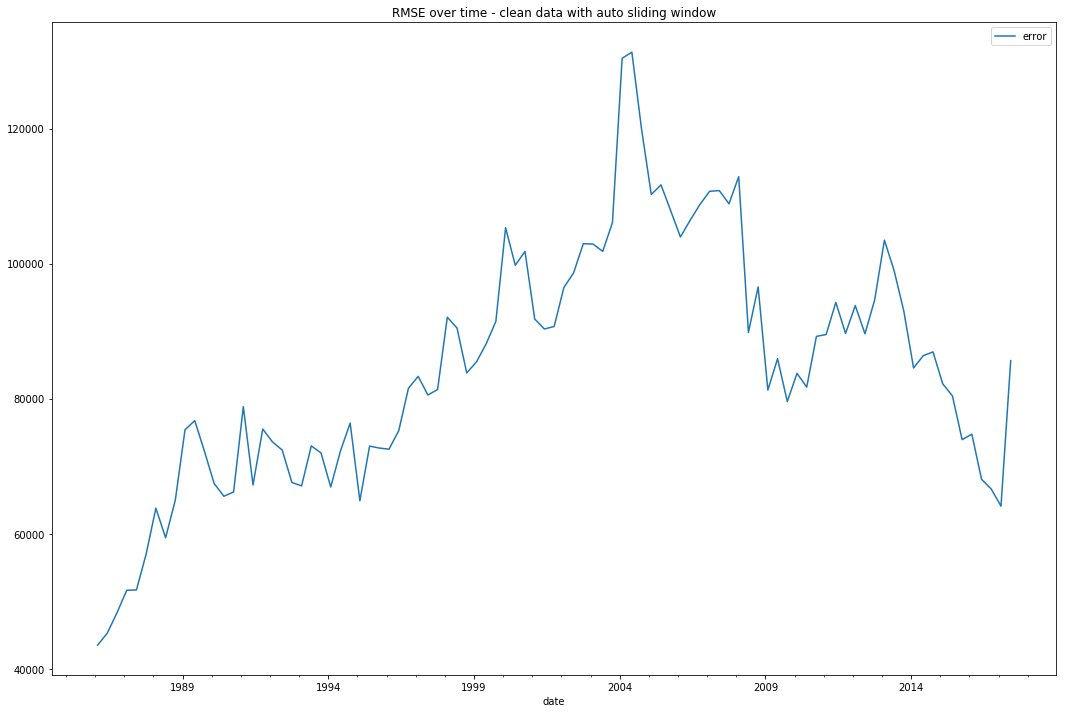

In [28]:
df_sum_auto_clean = mr_full.summary()
plot_trends(df_sum_auto_clean, ['error'], title='RMSE over time - clean data with auto sliding window')

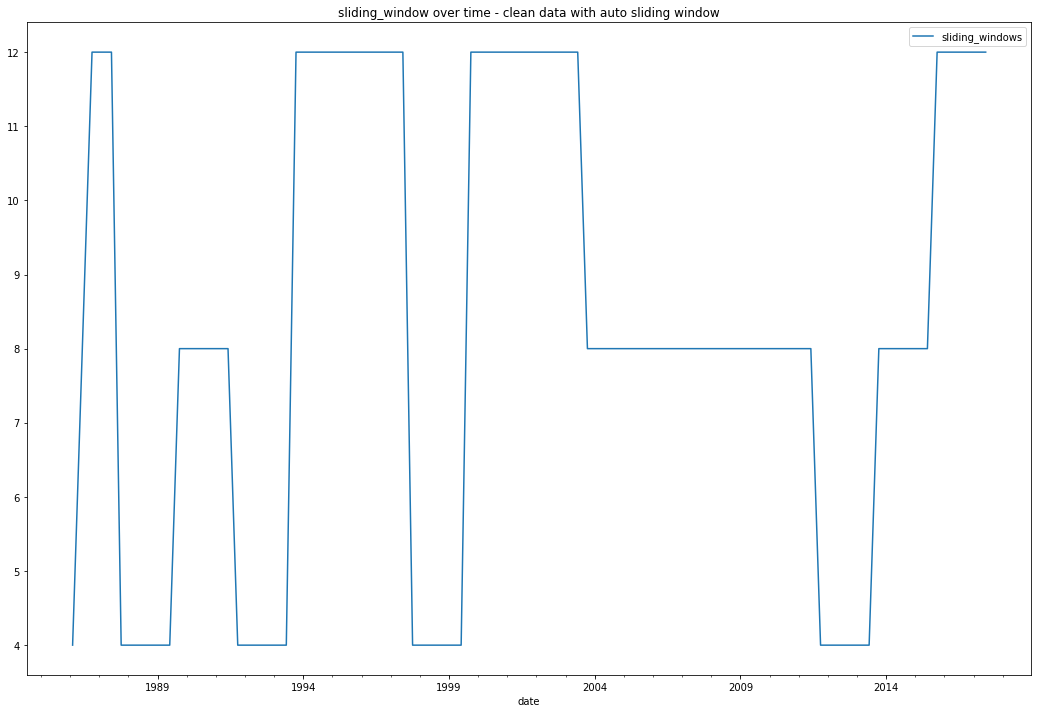

In [29]:
plot_trends(df_sum_auto_clean, ['sliding_windows'], title='sliding_window over time - clean data with auto sliding window')